In [2]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from utils import bootcampviztools as bt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("../data_sample/Absenteeism_at_work.csv", sep=";")

In [4]:
df.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   ...  Disciplinary failure  Education  Son  \
0                 239.554  ...                     0          1    2   
1                 239.554  ...                     1          1    1   
2                 239.554  ...                     0          1    0   
3                 239.554  ...                     0          1    2   
4                 239.554  ...                     0          1    2   

   Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0               1              0    1      90     172               30   
1               1              0    0      98     178               31   
2               1              0    0      89     170               31   
3               1              1    0      68     168               24   
4               1              0    1      90     172               30   

   Absenteeism time in hours  
0                          4  
1                          0  
2                          2  
3                          4  
4                          2  

[5 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

### TARGET

In [6]:
target = "Absenteeism time in hours"

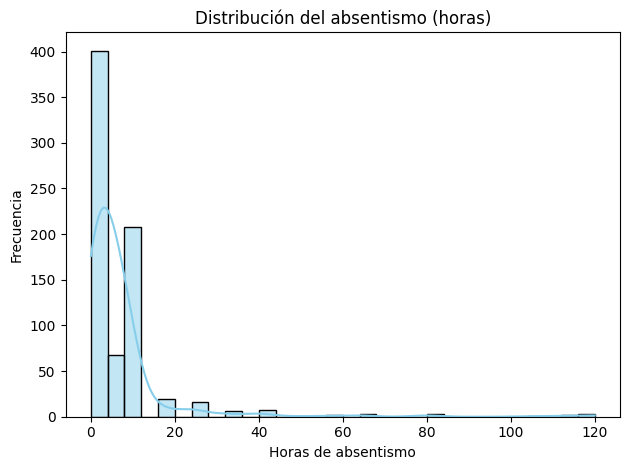

In [7]:
plt.figure()
sns.histplot(df["Absenteeism time in hours"], bins=30, kde=True, color='skyblue')
plt.title("Distribución del absentismo (horas)")
plt.xlabel("Horas de absentismo")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

*Hay una gran cantidad de registros con 0 horas de absentismo.*

*La distribución está sesgada a la derecha, con algunos valores atípicos por encima de 60 horas.*

In [8]:
df[target].unique()

array([  4,   0,   2,   8,  40,   1,   7,   3,  32,   5,  16,  24,  64,
        56,  80, 120, 112, 104,  48])

In [9]:
df["log_absenteeism"] = np.log1p(df[target])

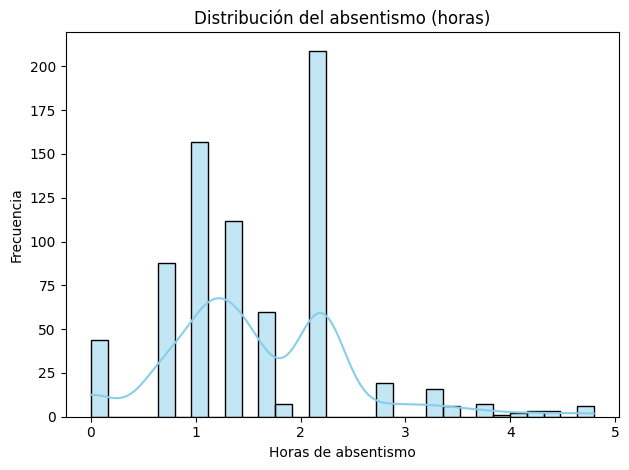

In [10]:
plt.figure()
sns.histplot(df["log_absenteeism"], bins=30, kde=True, color='skyblue')
plt.title("Distribución del absentismo (horas)")
plt.xlabel("Horas de absentismo")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

*La transformación tampoco resulta en una mejor distribución*

## RESTO FEATURES

Feature | Tipo | Descripción |
| ------ | ---- | -------- |
Reason for absence|	Categórica nominal|	Código de razón médica/social de la ausencia (0–28).
Month of absence|	Categórica nominal	|Mes en que ocurrió la ausencia (1 = enero, ..., 12 = diciembre).
Day of the week|	Categórica nominal	|Día de la semana (2 = lunes, 3 = martes, 4 = miércoles, 5 = jueves, 6 = viernes).
Seasons	| Categórica nominal |	Estación del año (1 = verano, ..., 4 = primavera).
Transportation expense |	Numérica continua	|Gasto mensual en transporte (en euros).
Distance from Residence to Work |	Numérica continua	|Distancia desde la residencia al trabajo (en km).
Service time|	Numérica discreta|	Años de antigüedad en la empresa.
Age	|Numérica continua|	Edad del empleado (en años).
Work load Average/day |	Numérica continua	|Carga de trabajo promedio por día (en minutos). 
Hit target |	Numérica discreta |	Porcentaje de cumplimiento de objetivos.
Disciplinary failure |	Categórica binaria |	0 = no, 1 = sí (fallos disciplinarios previos).
Education |	Categórica ordinal |	Nivel educativo (1 = instituto, 2 = graduado, 3 = postgrado, 4 = doctorado).
Son |	Numérica discreta|	Número de hijos. (*tratar como categórica)
Social drinker|	Categórica binaria |	0 = no, 1 = sí (consume alcohol socialmente).
Social smoker |	Categórica binaria |	0 = no, 1 = sí (fuma en contexto social).
Pet	| Numérica discreta |	Número de mascotas. (*tratar como categórica)
Weight |	Numérica continua |	Peso del empleado (en kg).
Height |	Numérica continua	| Altura del empleado (en cm).
Body mass index (BMI)|	Numérica continua|	Índice de masa corporal. Calculado a partir de peso y altura.
Absenteeism time in hours|	Numérica continua (target)|	Total de horas de ausencia laboral.

(21, 2)


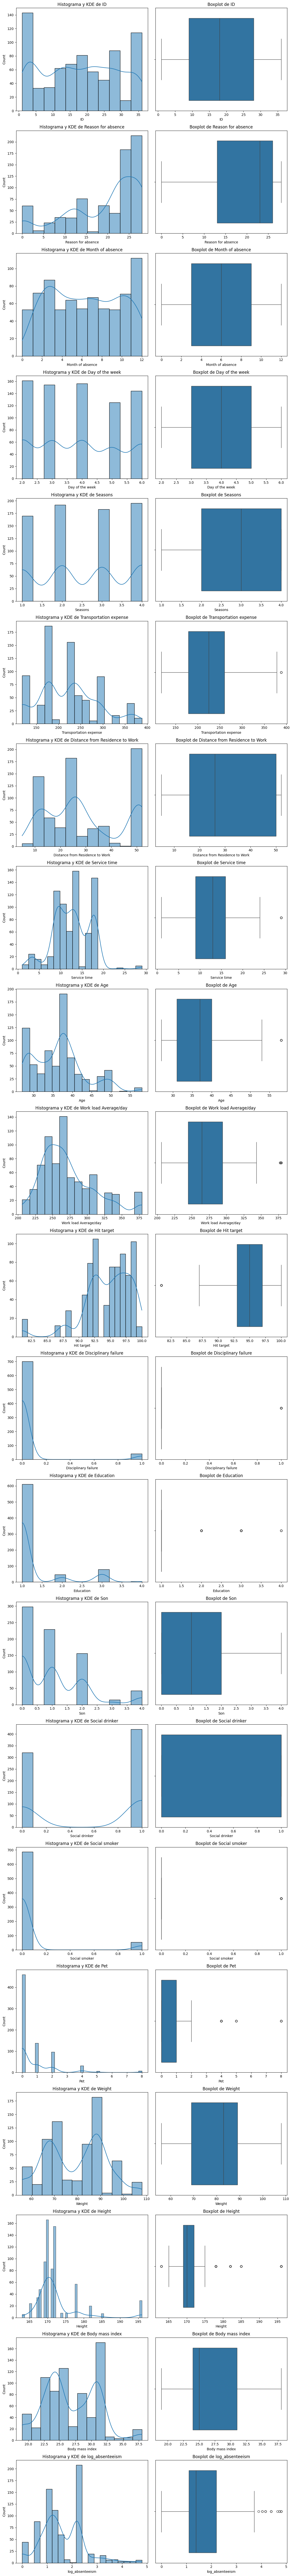

In [11]:
bt.plot_combined_graphs(df, [col for col in df.columns if col != target])

## MAPA CORRELACIONES

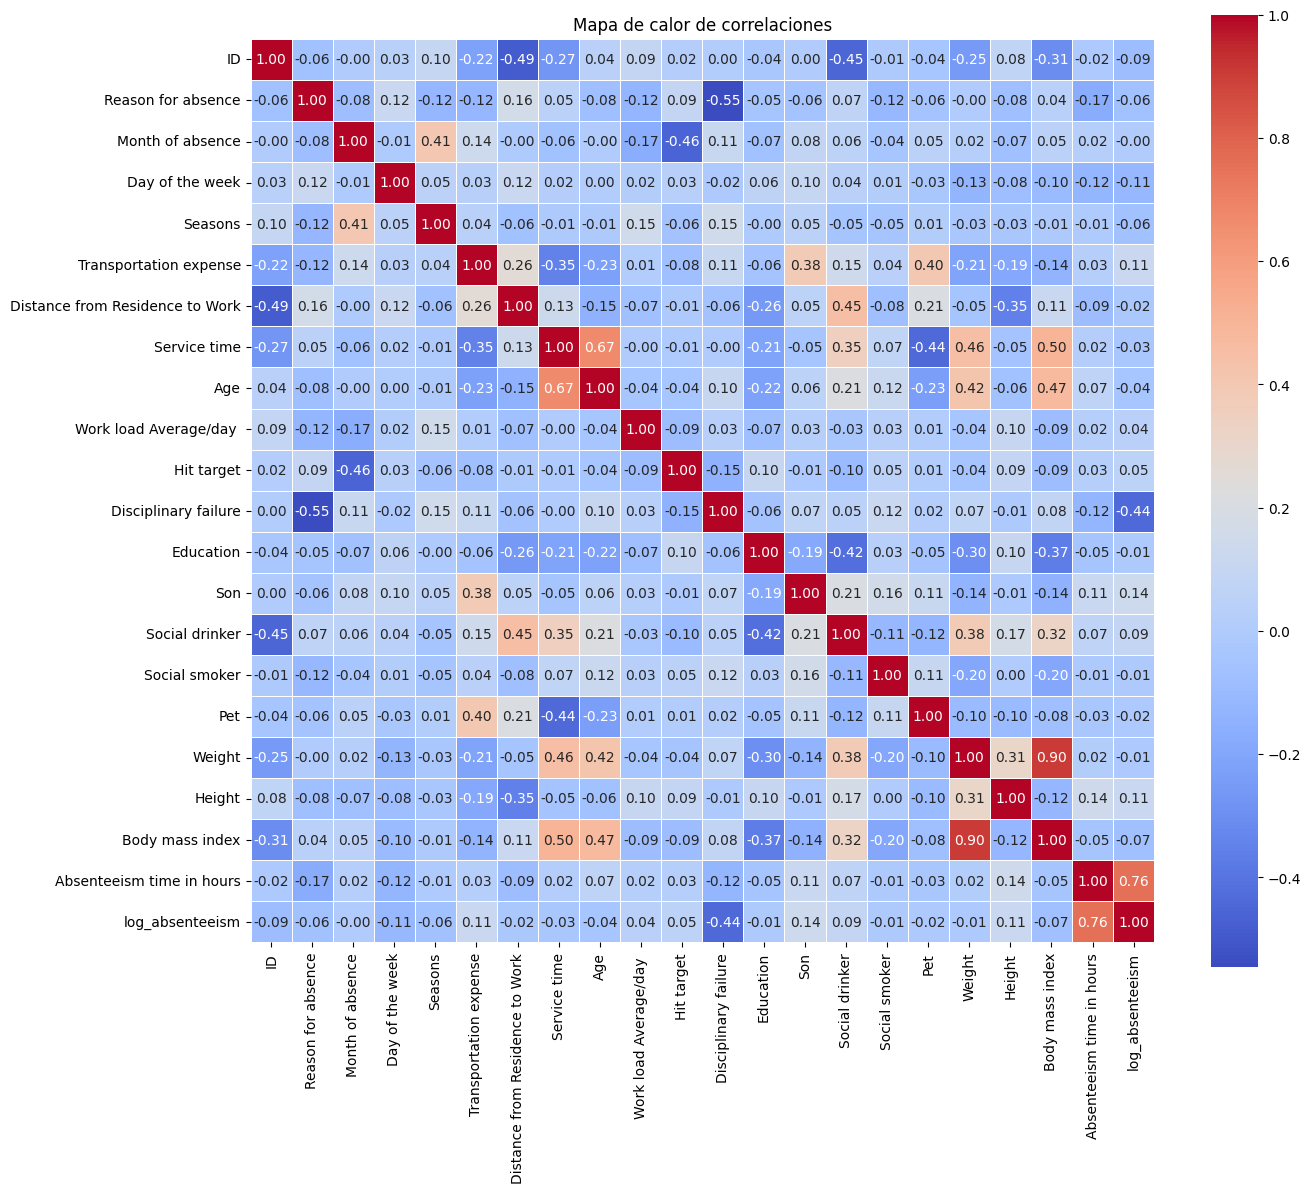

In [12]:
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.tight_layout()
plt.show()

*`Body mass index`, `Weight` y `Height` están correlacionadas entre sí, como era de esperar.*

*`Age`, `Service time`, `Transportation expense` y `Distance from Residence to Work` tienen correlaciones leves con el absentismo.*

*La correlación directa con el target es baja en general, lo cual indica que el comportamiento puede ser más complejo o no lineal.*

In [13]:
features_cat = [ "Reason for absence", "Month of absence", "Day of the week", "Seasons", "Disciplinary failure", "Education", "Social drinker", "Social smoker", "Pet", "Son"]
features_num = ["Transportation expense", "Distance from Residence to Work", "Service time", "Age", "Work load Average/day ", "Hit target", "Weight", "Height", "Body mass index"]

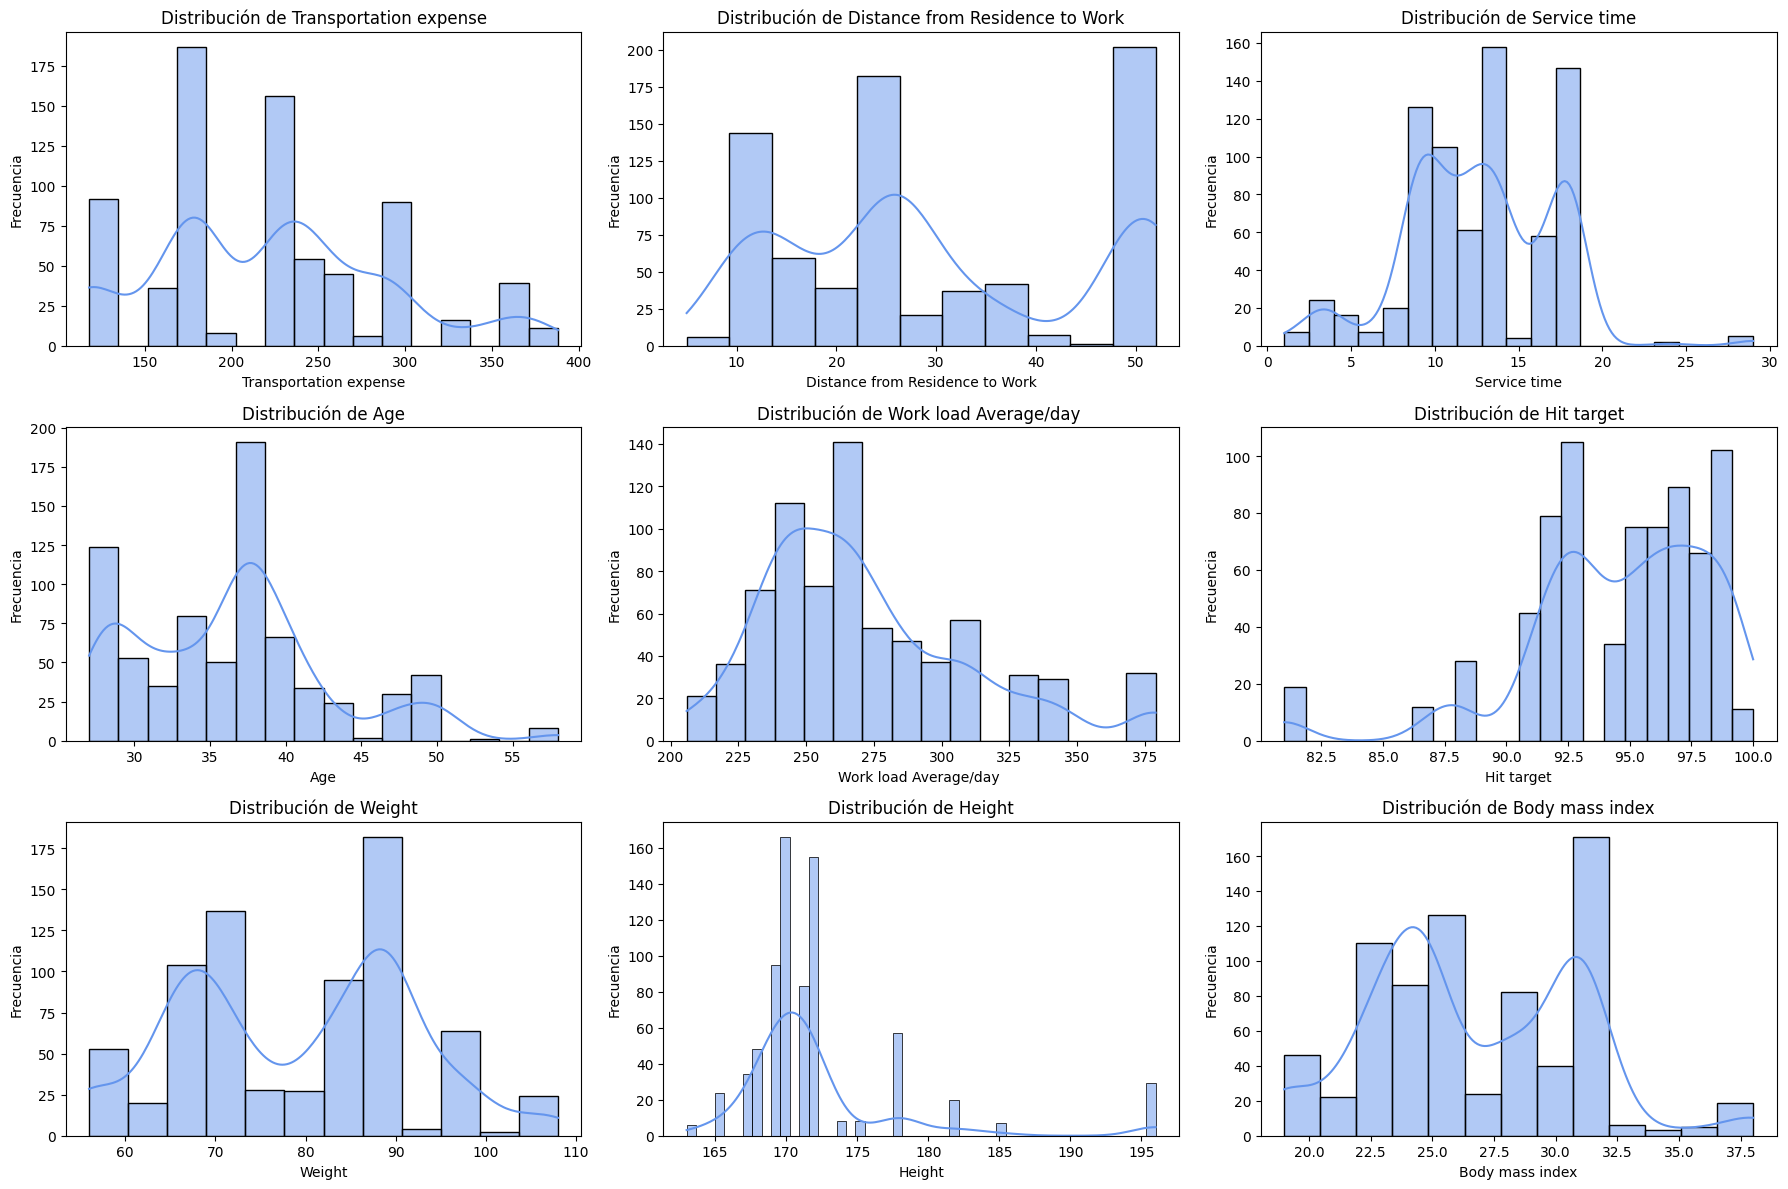

In [14]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(features_num):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, color='cornflowerblue')
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

<Axes: >

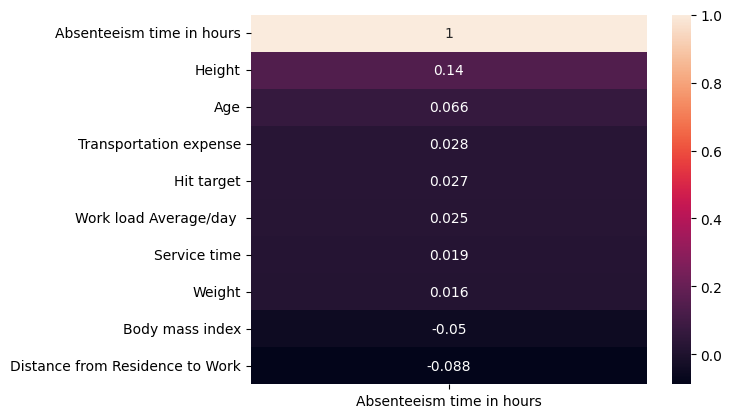

In [15]:
features = features_num + [target]
corr = df[features].corr(numeric_only=True)
sns.heatmap(corr[[target]].sort_values(by=target, ascending=False), annot=True)

*`Weight` y `Height` se encuentran directamente relacionadas con `Body mass index`*

In [16]:
df['BMI_calculado'] = df['Weight'] / ((df['Height'] / 100) ** 2)

C:\Users\emmag\AppData\Local\Temp\ipykernel_21444\888812377.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


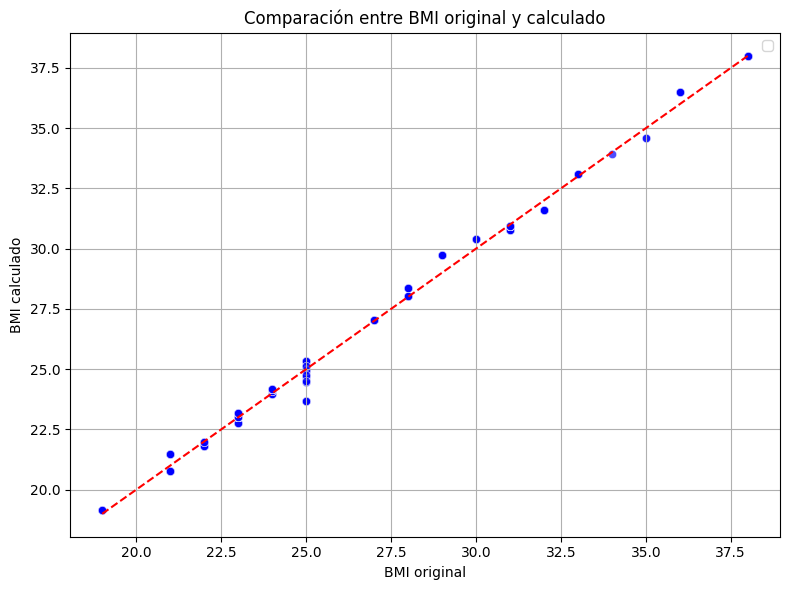

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Body mass index'], y=df['BMI_calculado'], alpha=0.7, color='blue')
plt.plot([df['Body mass index'].min(), df['Body mass index'].max()],
         [df['Body mass index'].min(), df['Body mass index'].max()],
         color='red', linestyle='--')
plt.xlabel('BMI original')
plt.ylabel('BMI calculado')
plt.title('Comparación entre BMI original y calculado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
#diferencia
diff = (df['Body mass index'] - df['BMI_calculado']).abs().mean()
print(f"Diferencia media entre BMI original y calculado: {diff:.4f}")

Diferencia media entre BMI original y calculado: 0.2154


*Scatterplots de las variables numéricas*

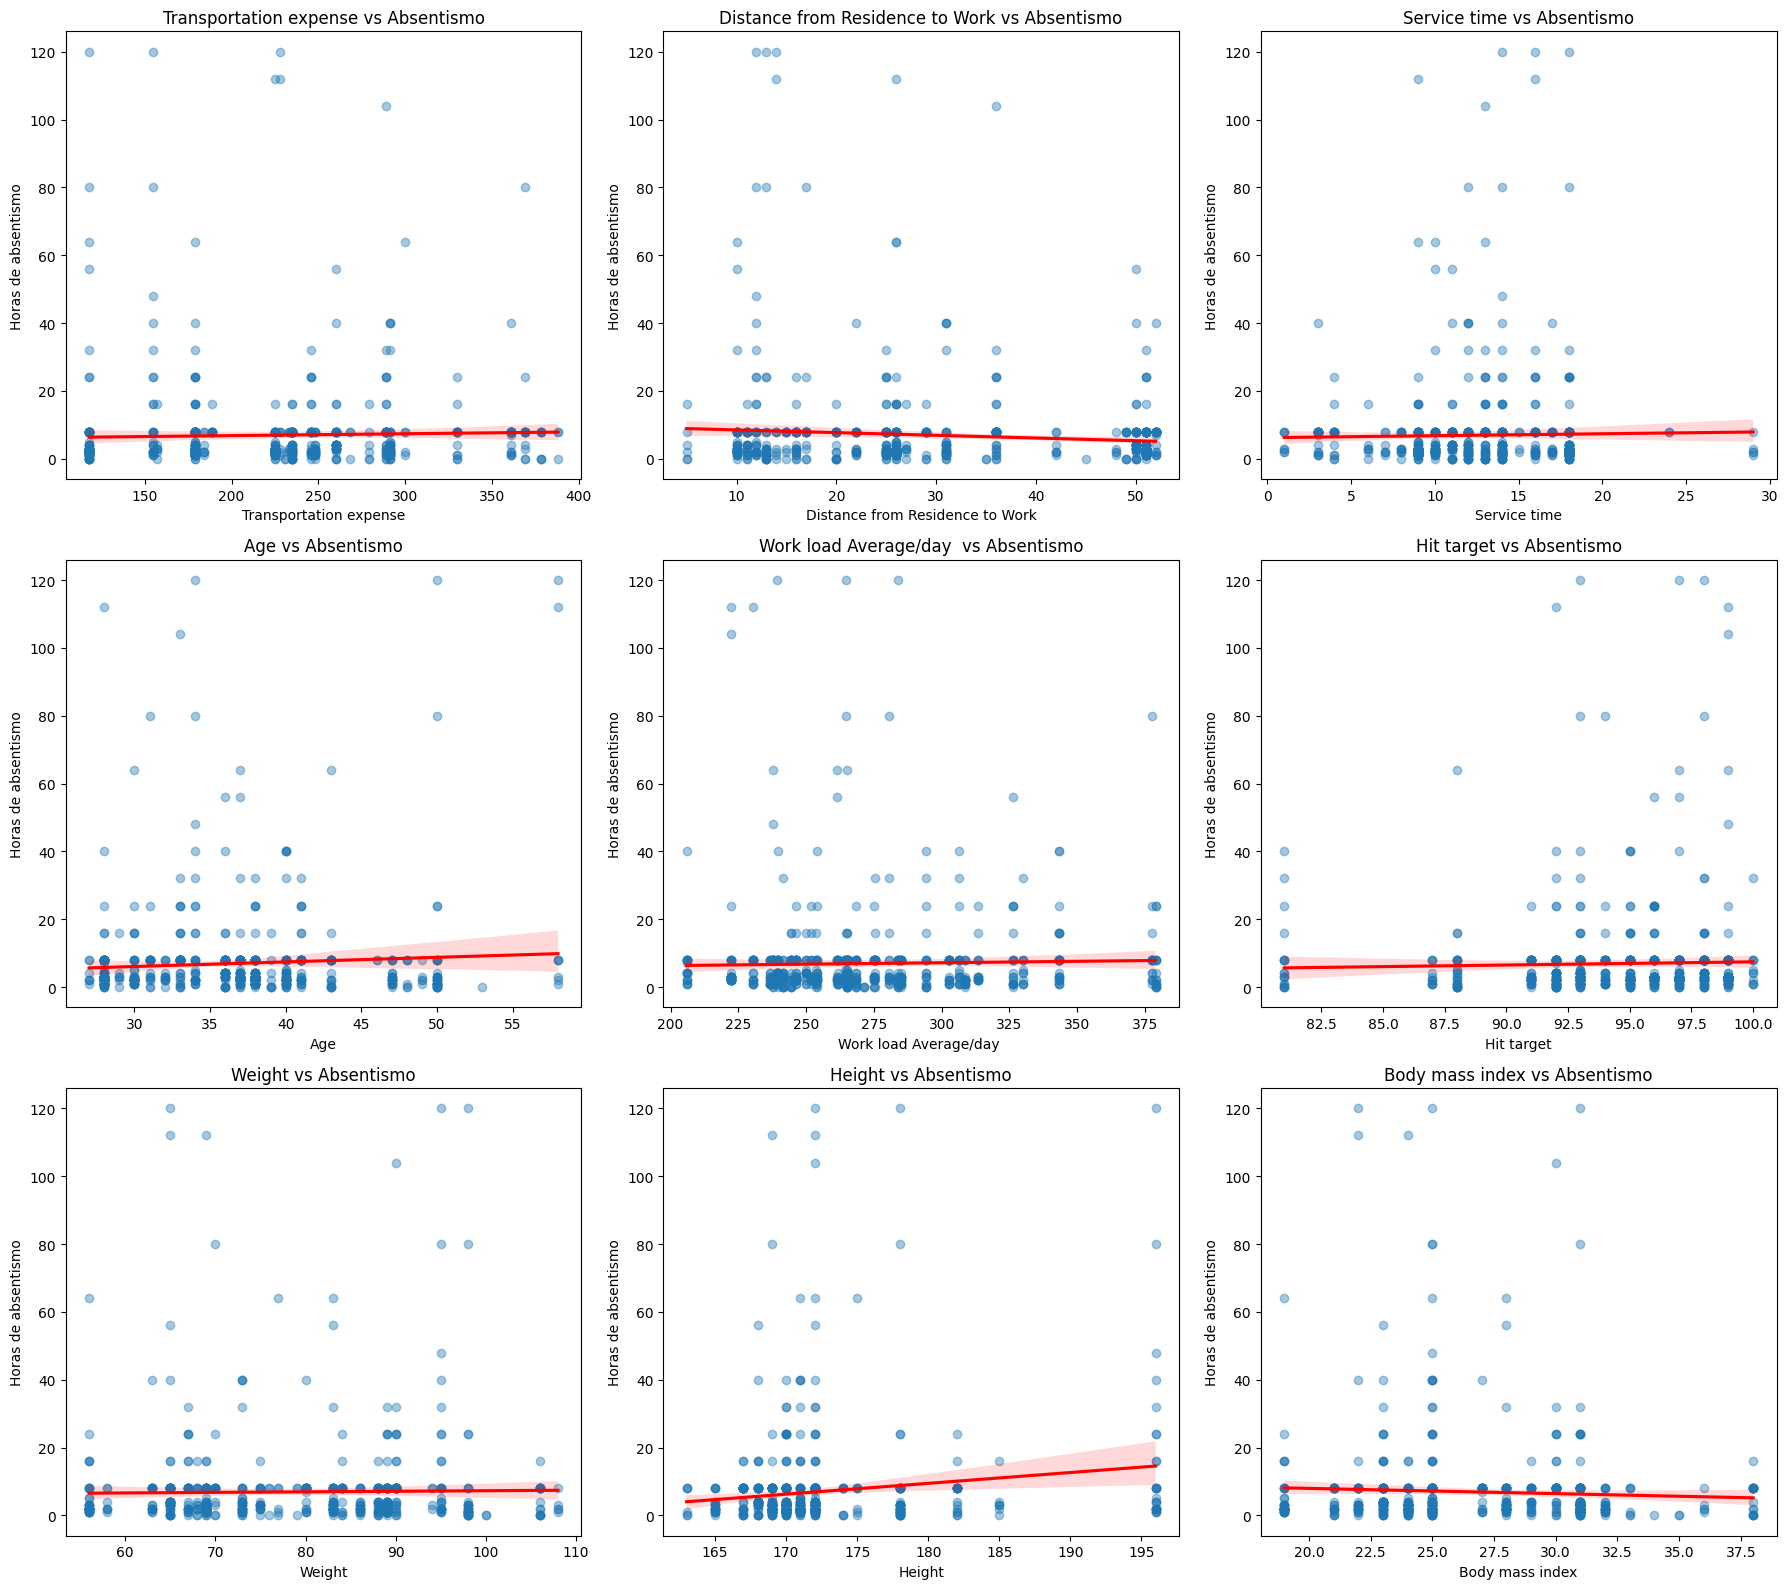

In [19]:
plt.figure(figsize=(18, 16))
for i, var in enumerate(features_num):
    plt.subplot(3, 3, i + 1)
    sns.regplot(x=var, y="Absenteeism time in hours", data=df, 
                scatter_kws={'alpha':0.4}, line_kws={'color': 'red'})
    plt.title(f"{var} vs Absentismo")
    plt.xlabel(var)
    plt.ylabel("Horas de absentismo")

plt.tight_layout()
plt.show()

*Con los scatterplots vemos que:*

**Tendencias planas o muy débiles**

La mayoría de las líneas de regresión son planas → esto sugiere poca o ninguna relación lineal entre esas variables y el absentismo.


**Alta concentración en 0 horas**

Hay muchos puntos acumulados en y = 0, lo cual indica que una gran parte de los trabajadores no ha faltado nunca. Esto puede estar enmascarando patrones.


**Outliers importantes**

Algunos empleados tienen más de 80 o incluso 100 horas de ausencia. Estos puntos pueden distorsionar promedios y relaciones lineales.

## CATEGÓRICAS

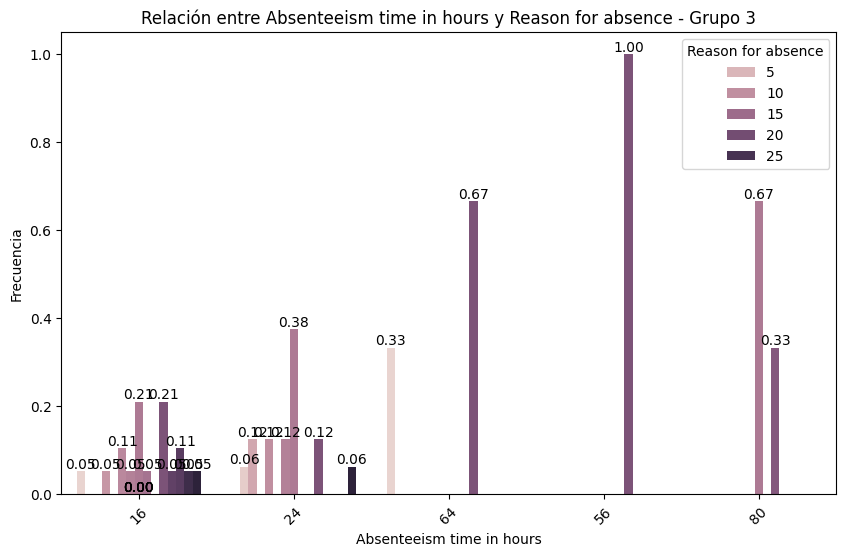

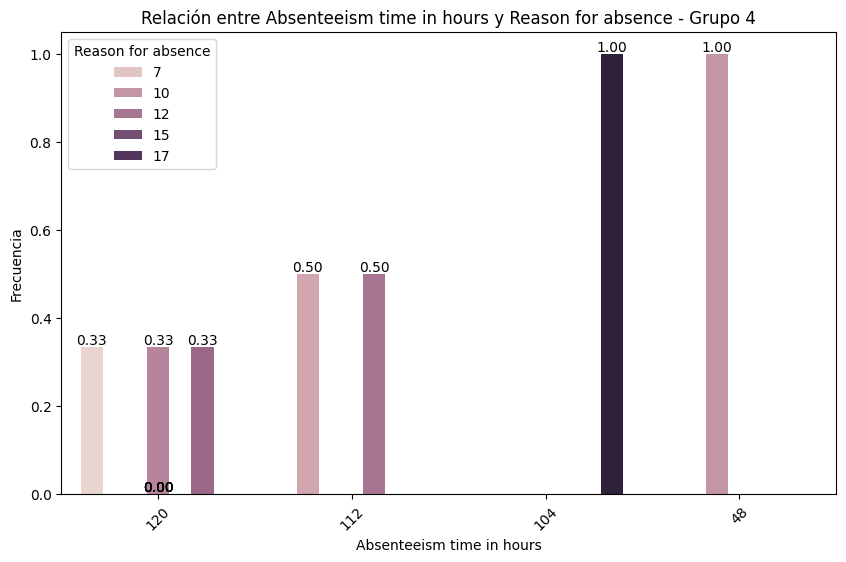

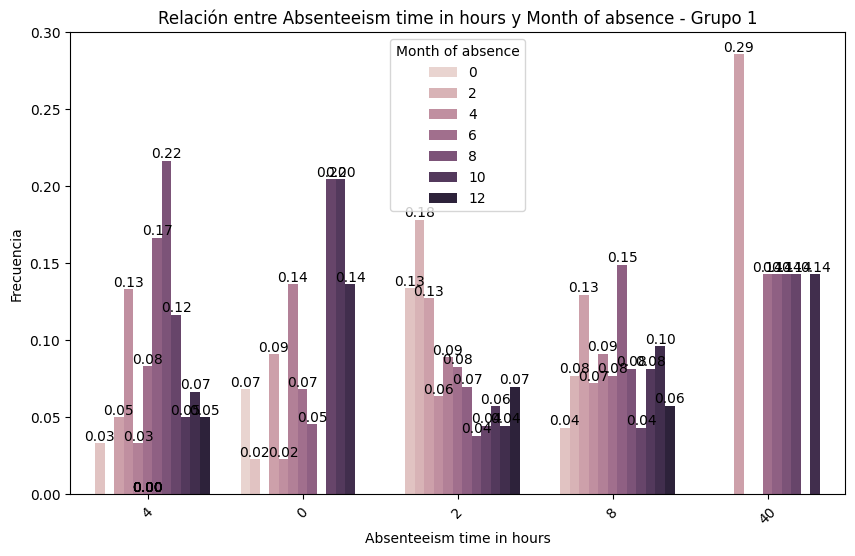

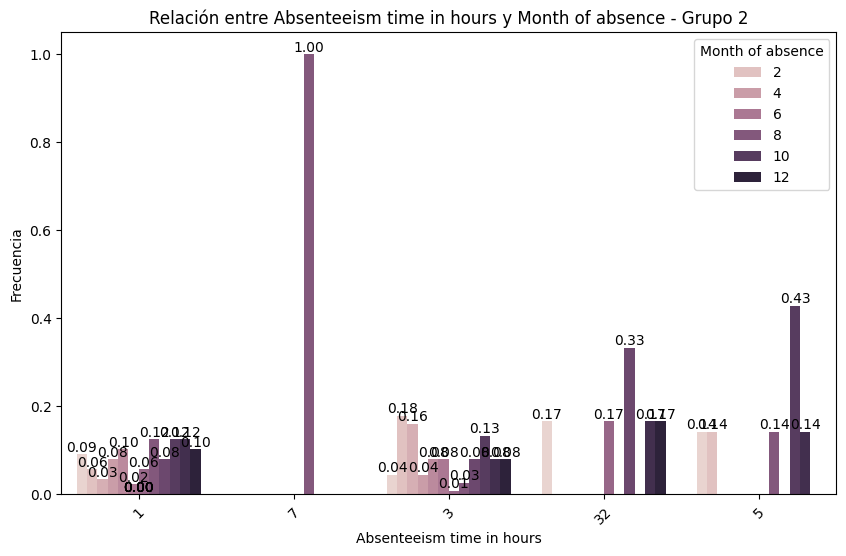

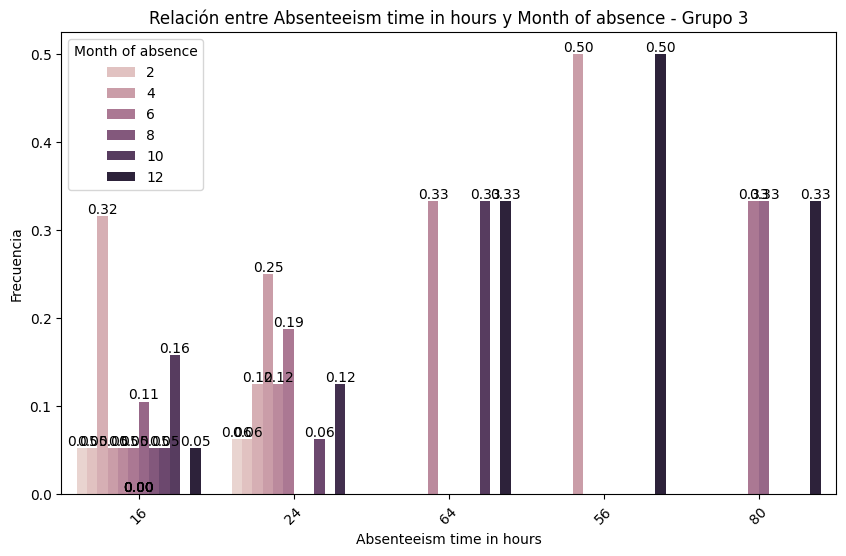

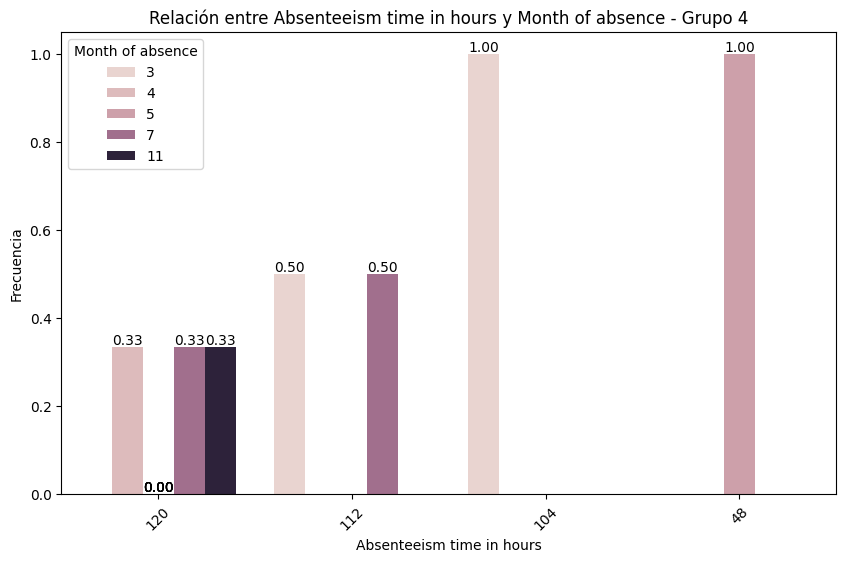

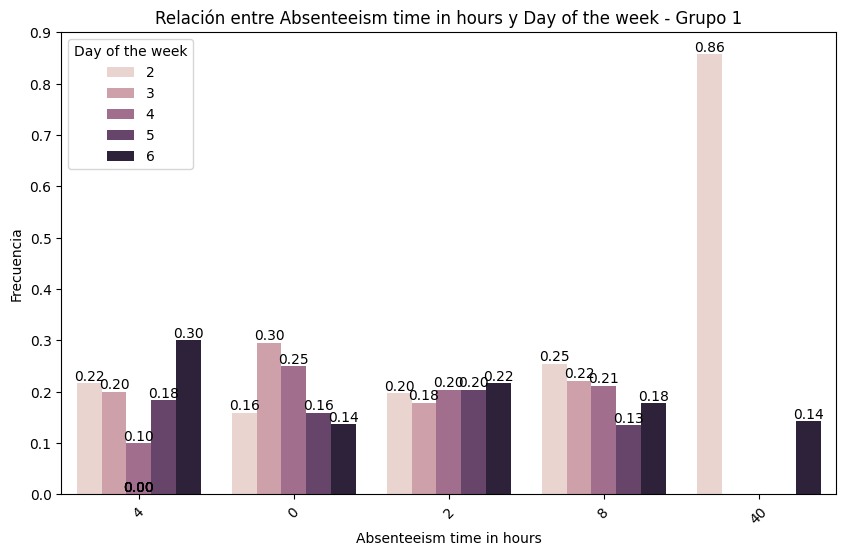

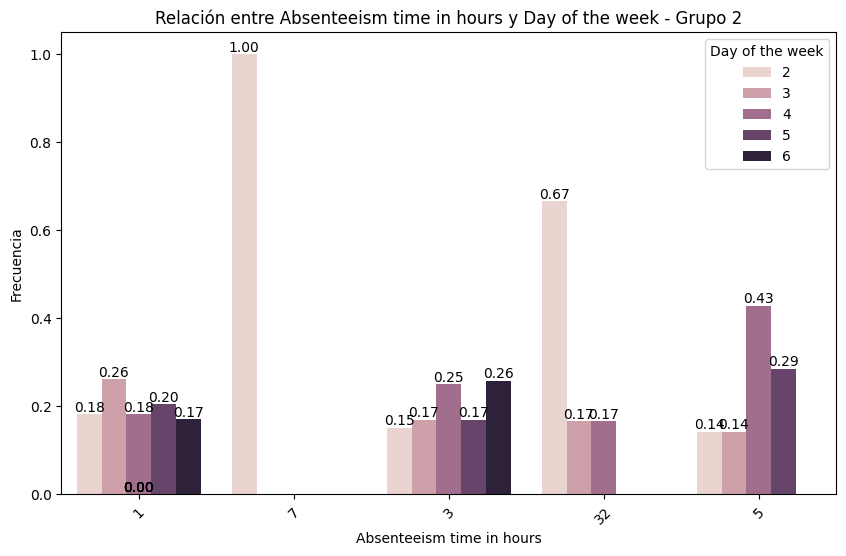

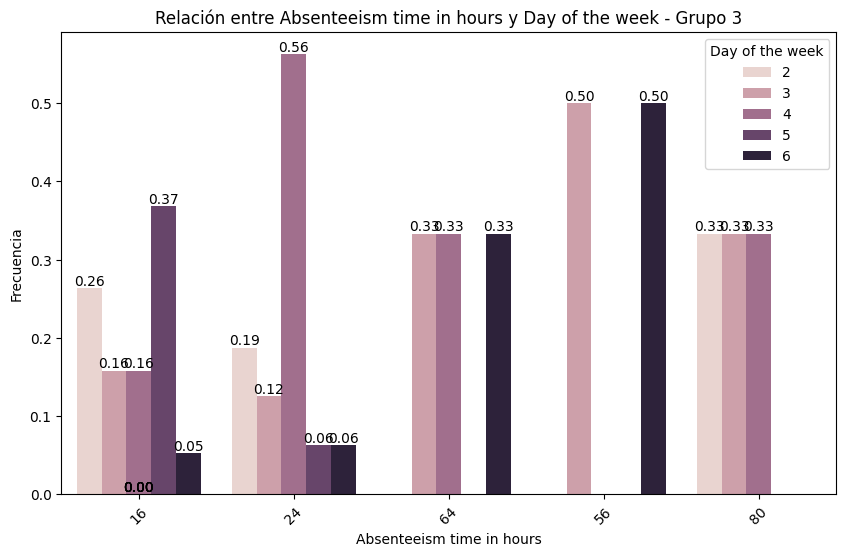

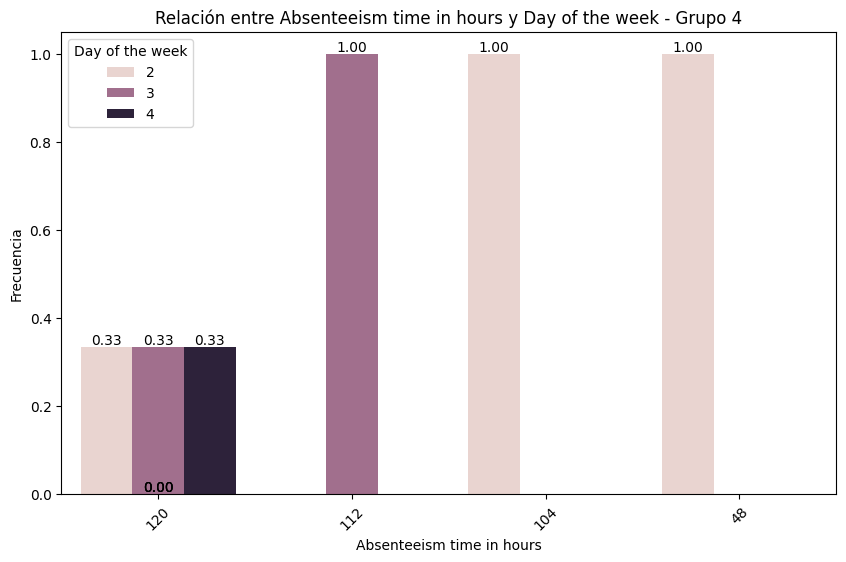

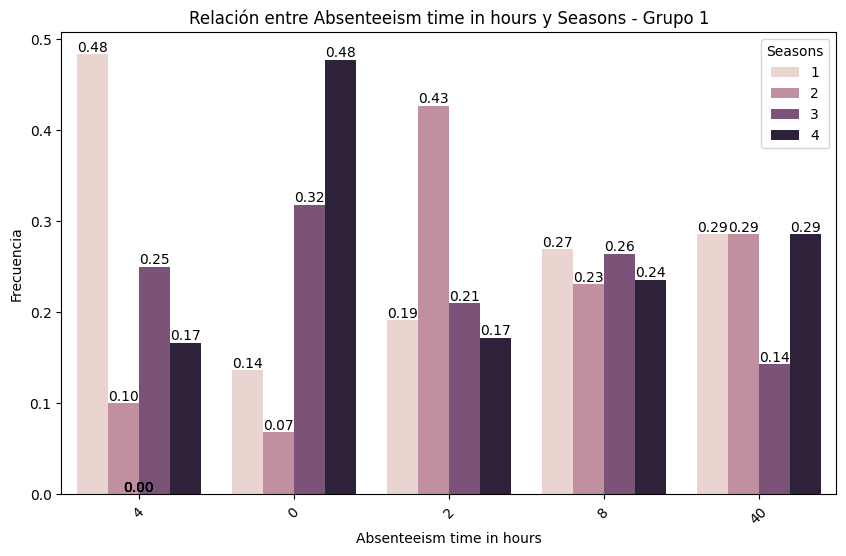

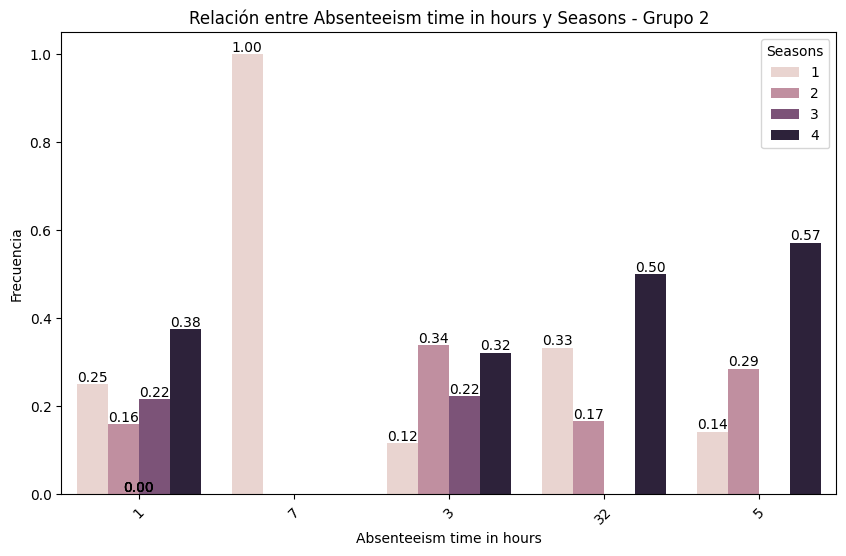

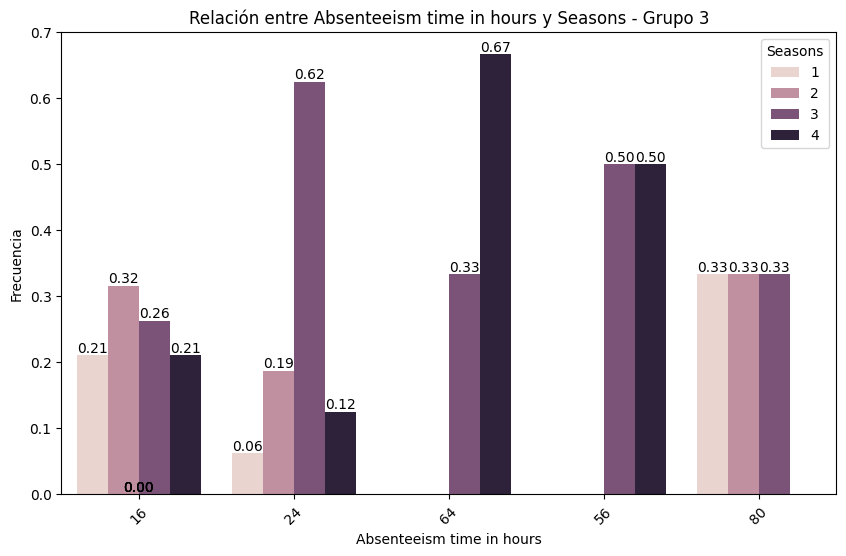

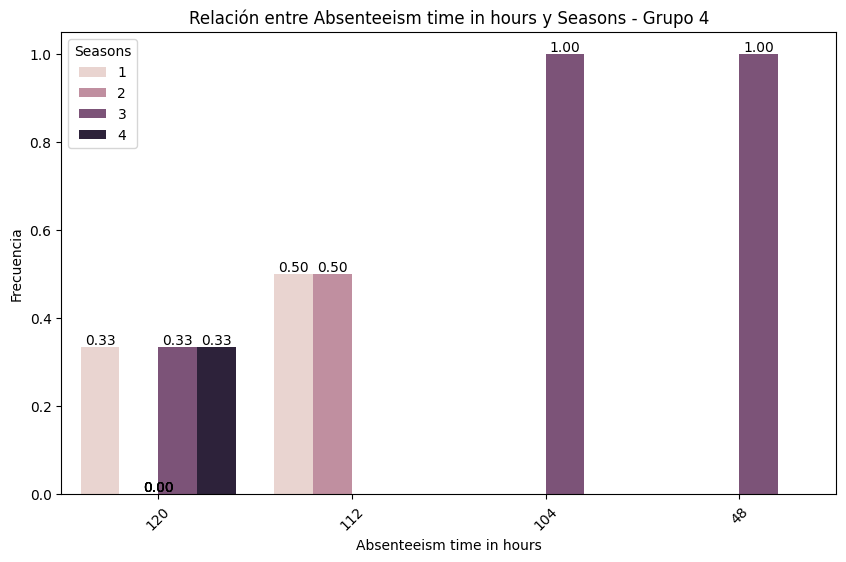

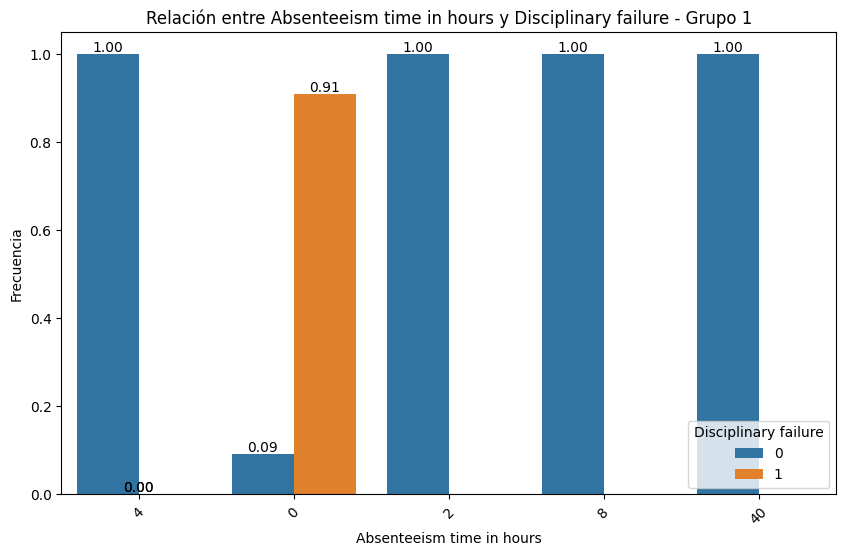

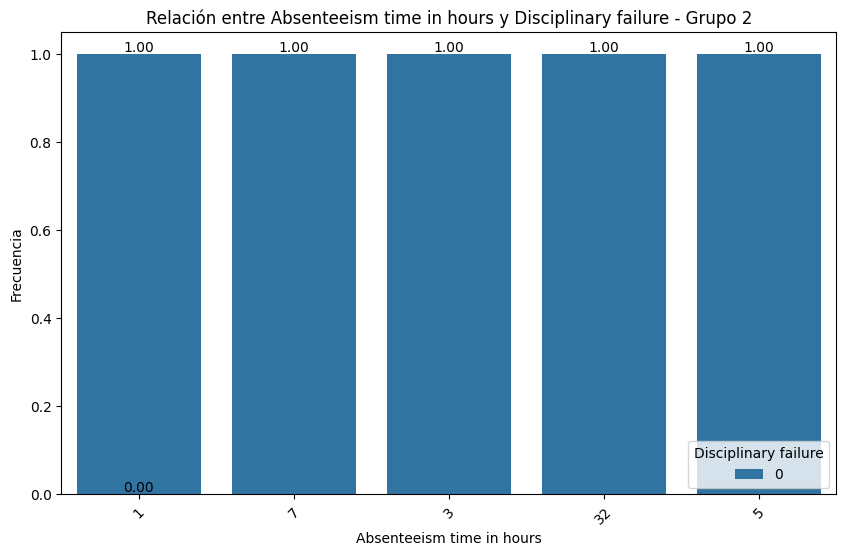

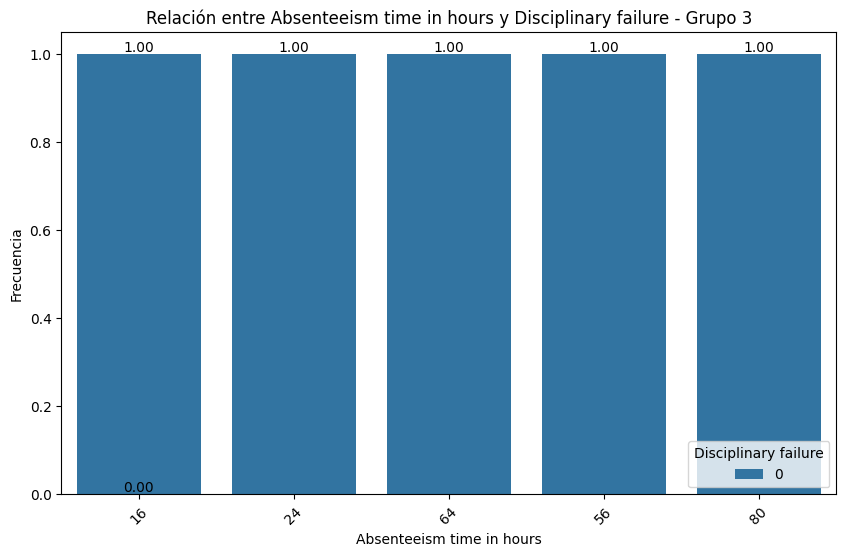

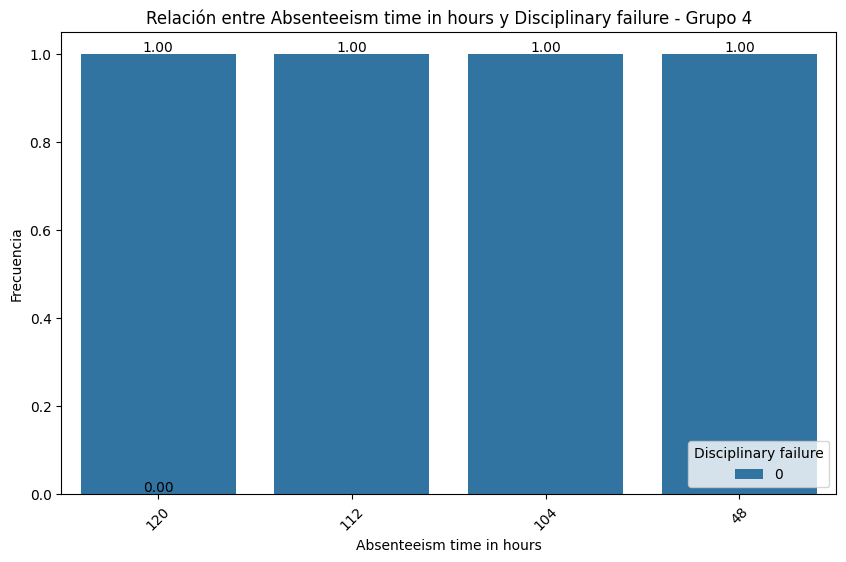

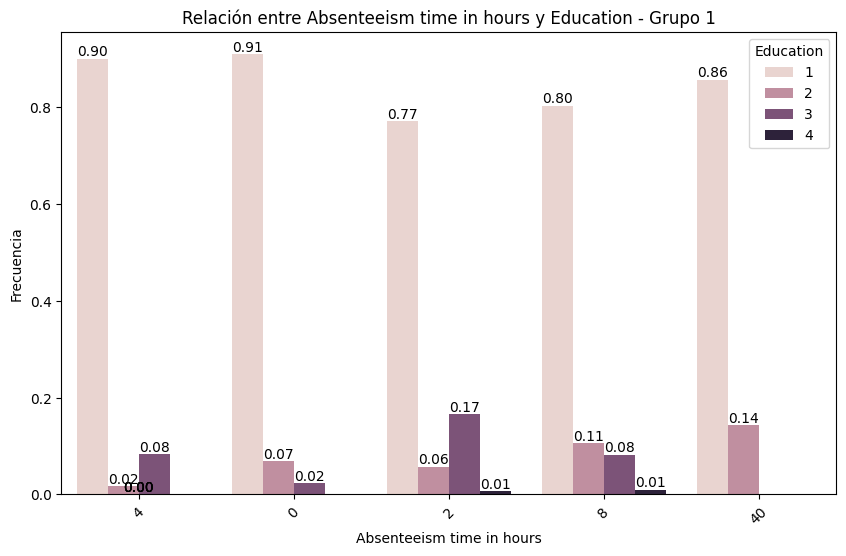

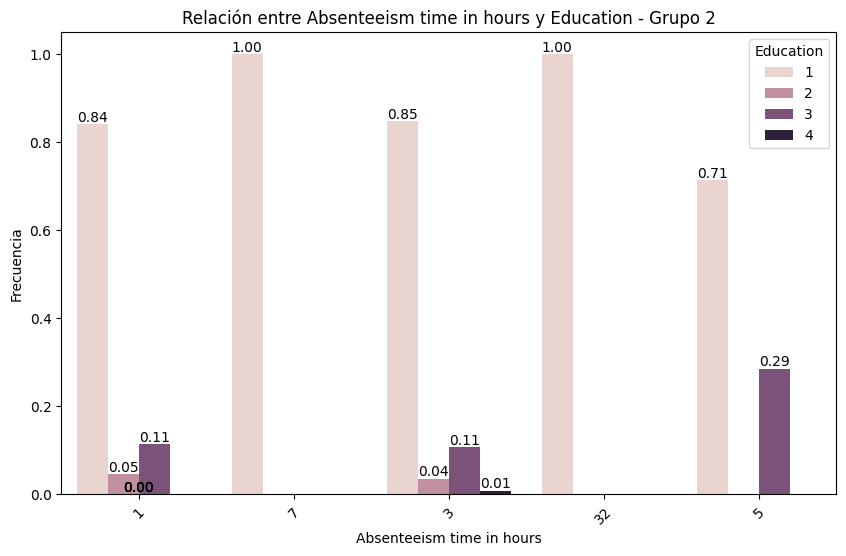

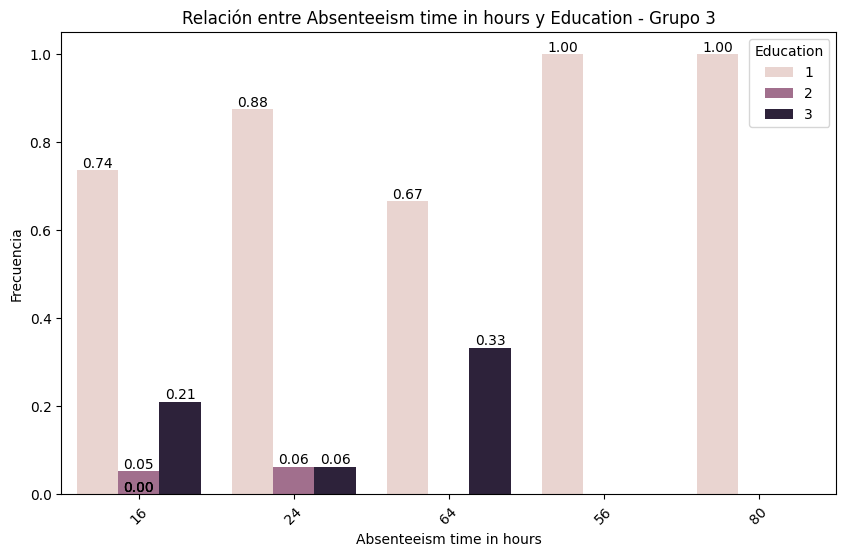

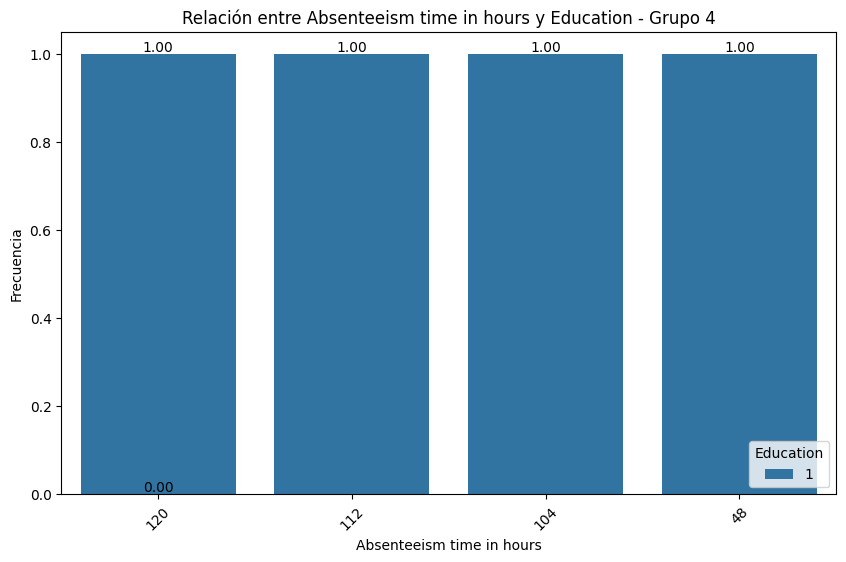

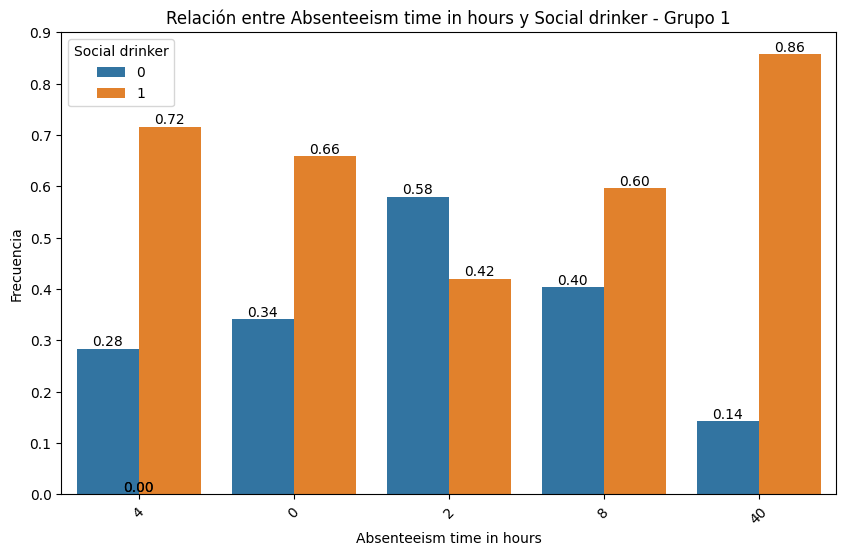

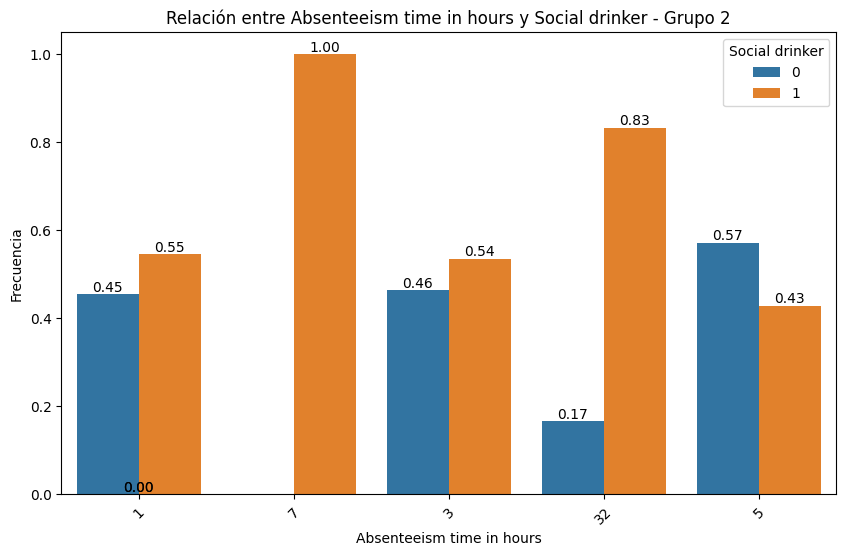

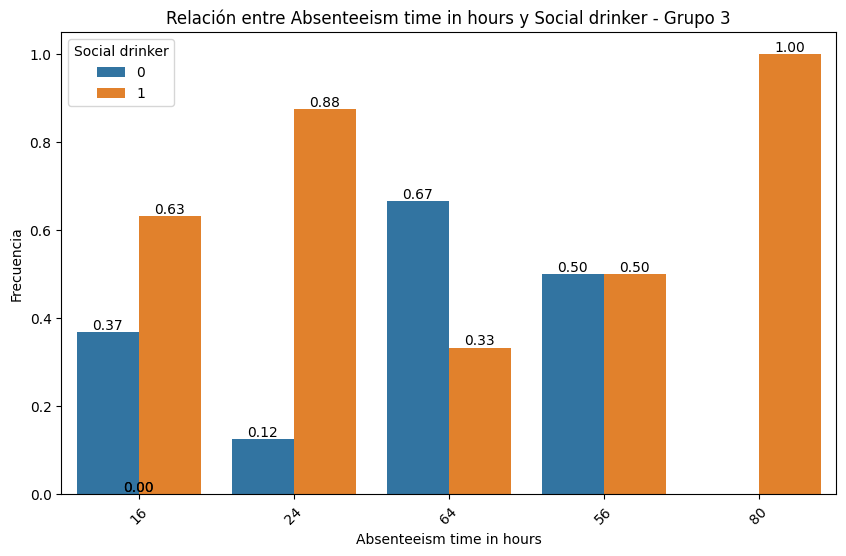

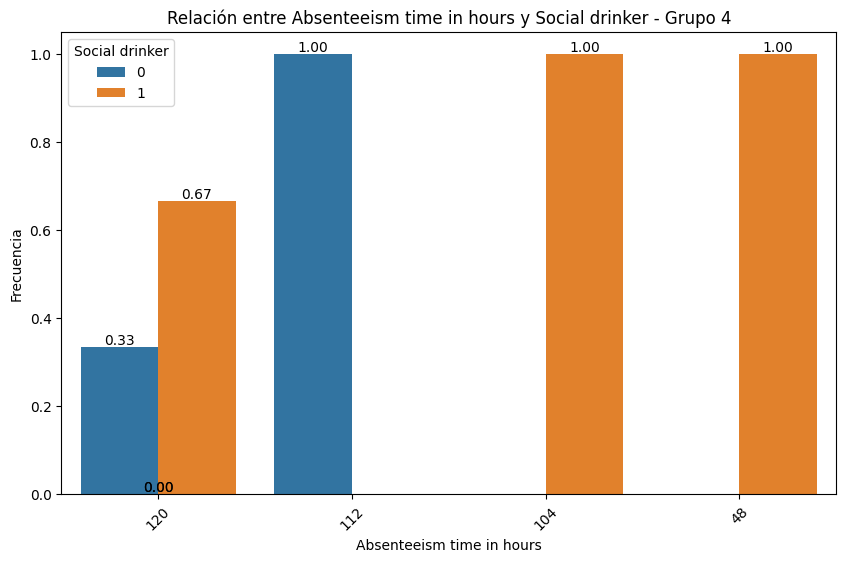

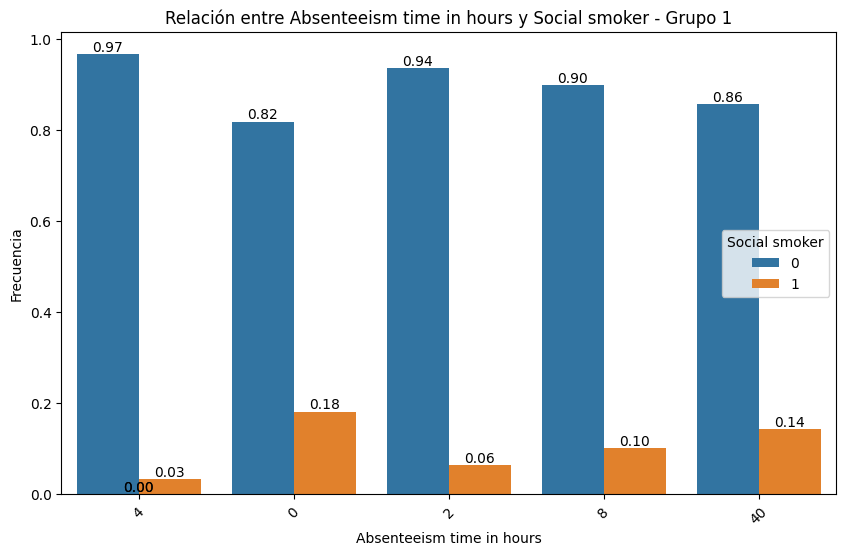

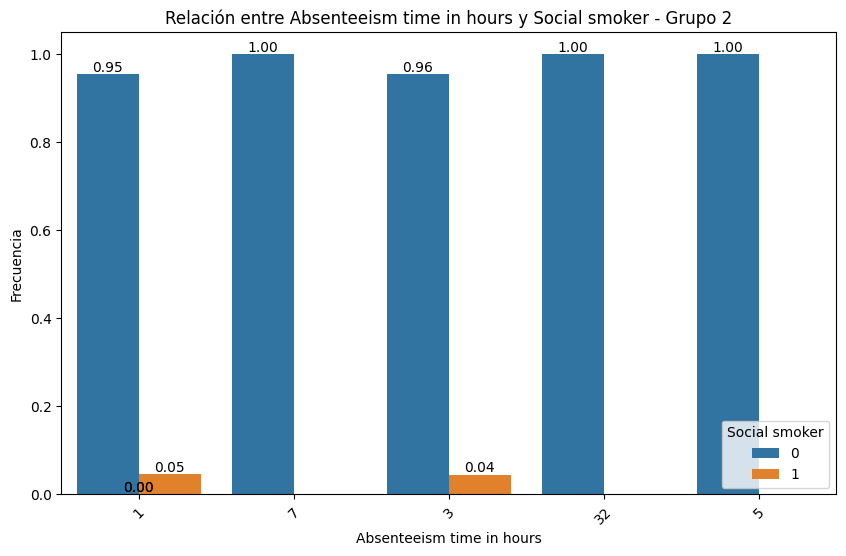

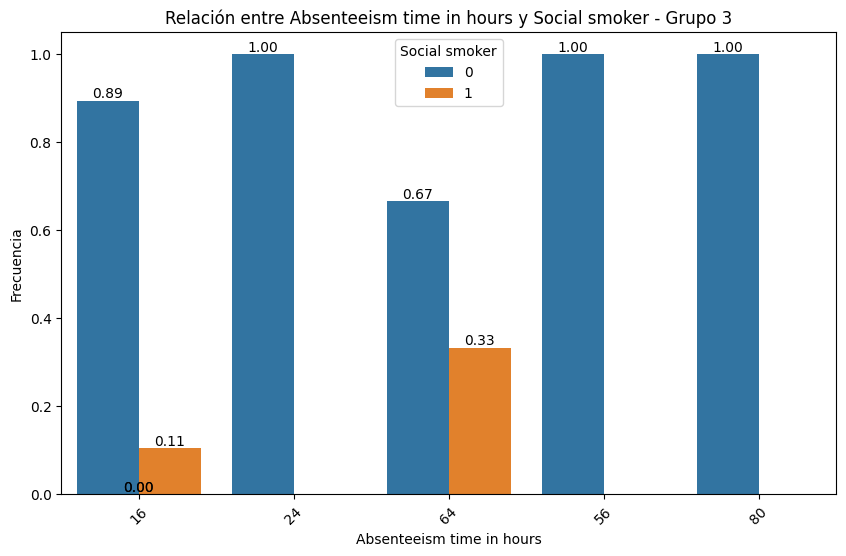

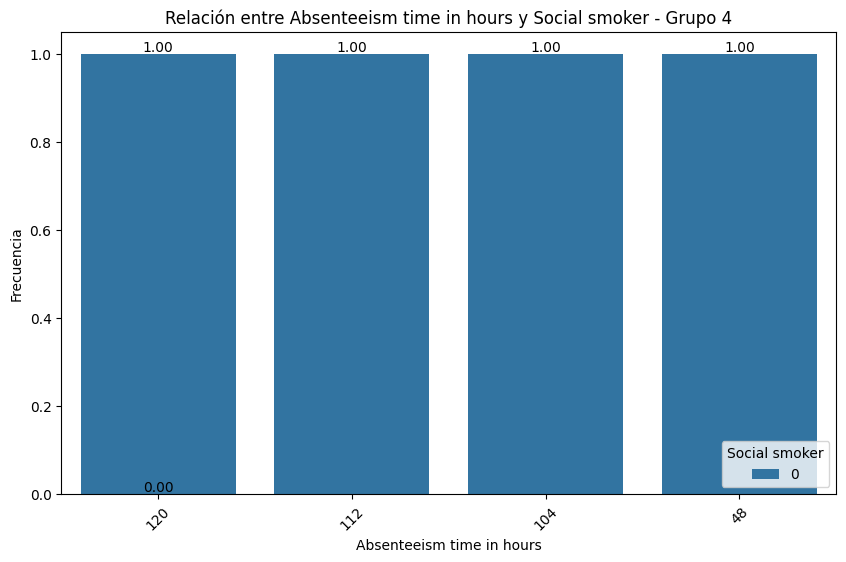

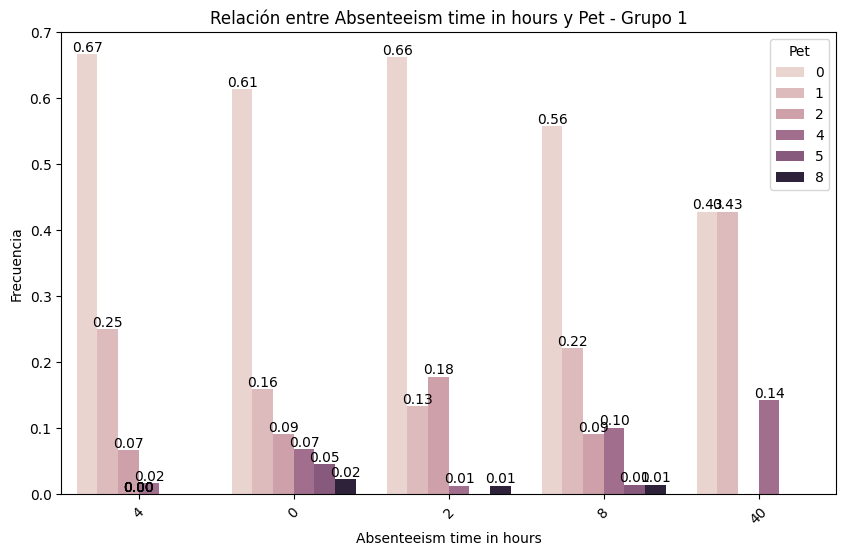

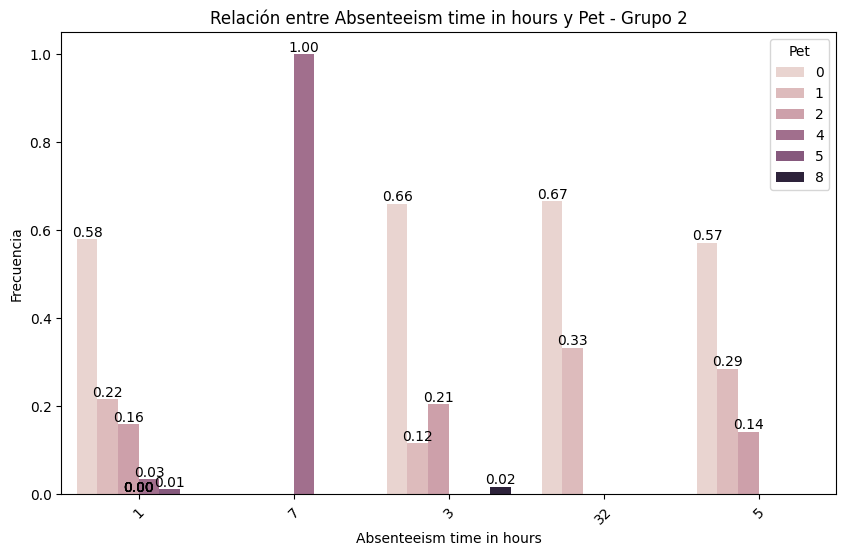

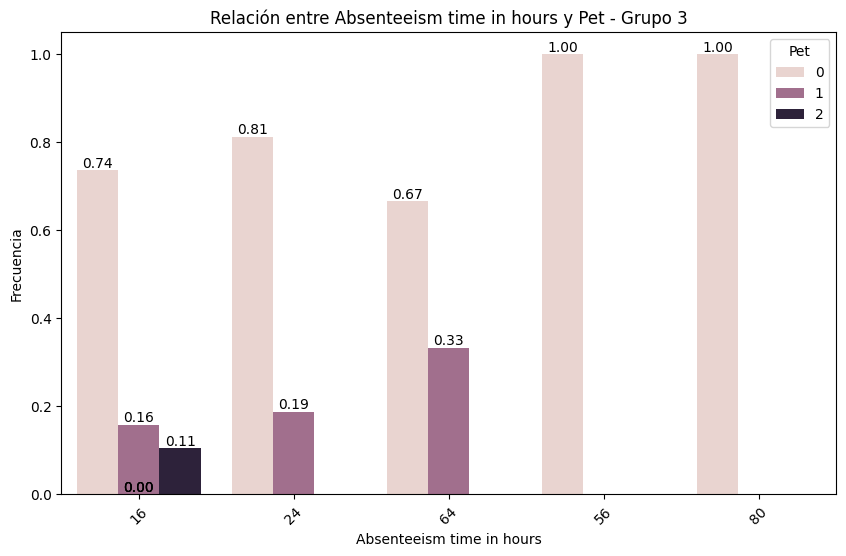

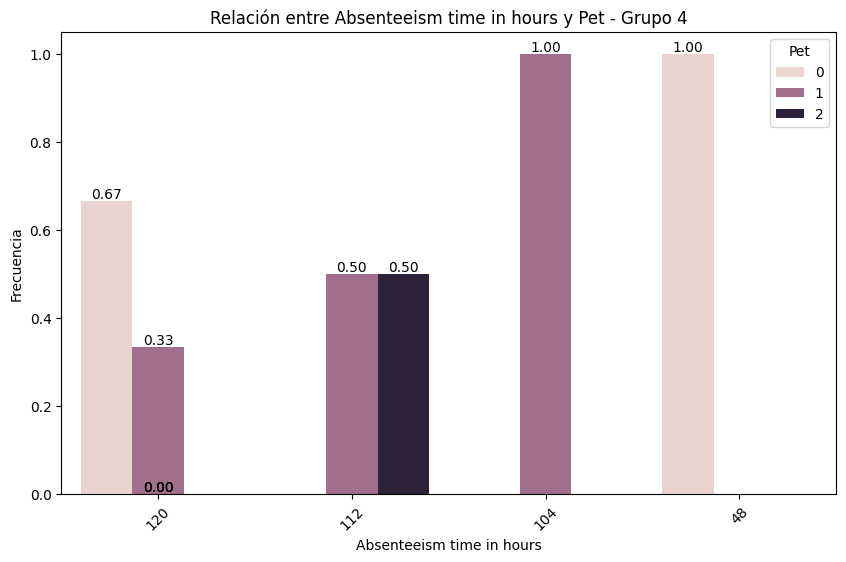

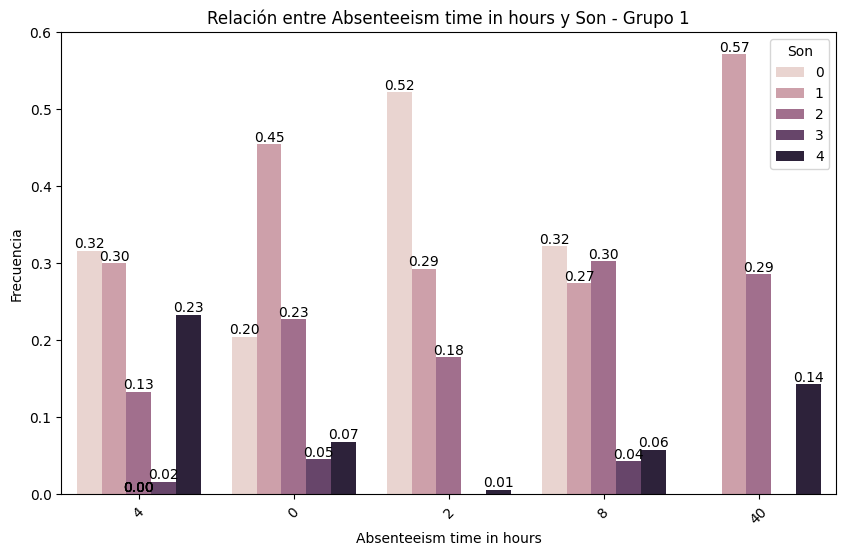

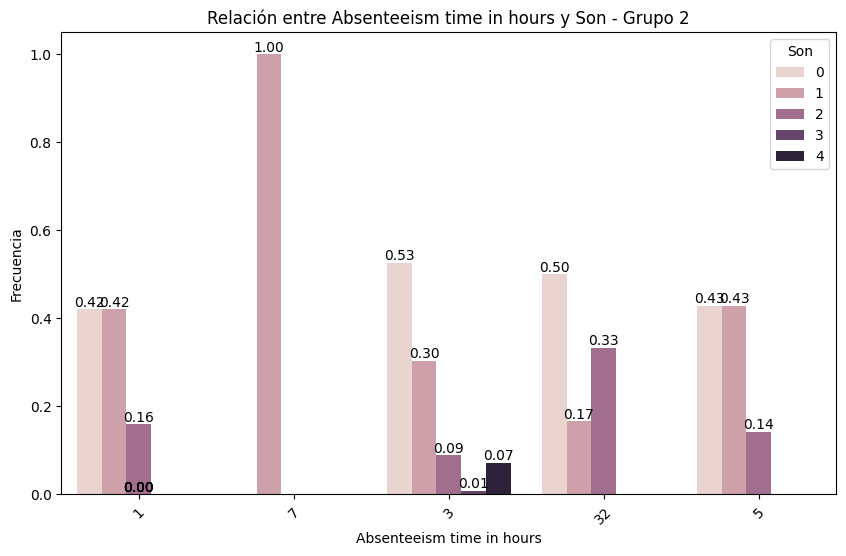

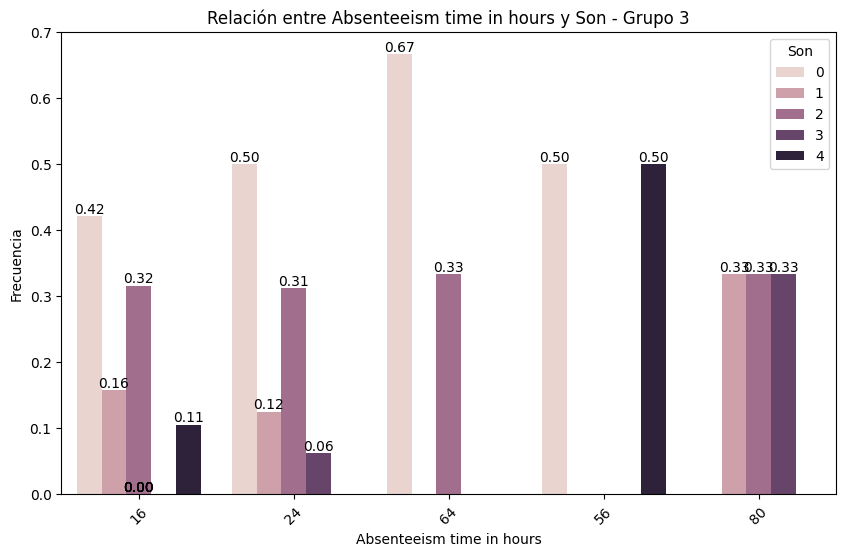

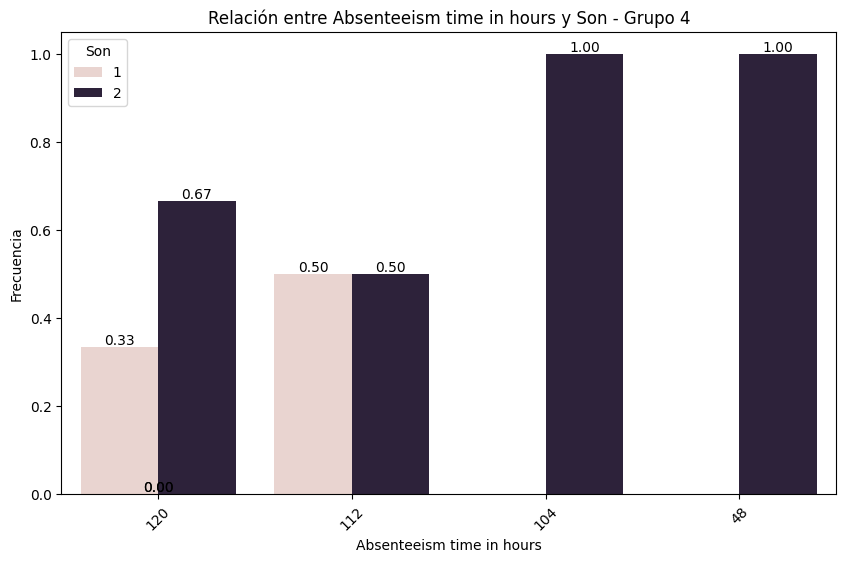

In [20]:
for col in features_cat:
    bt.plot_categorical_relationship_fin(df, target, col, show_values=True, relative_freq=True)

*Las gráficas proporcionadas no esclarecen demasiado la situación, vamos a ver variable a variable*

In [21]:
df["Reason for absence"].value_counts().sort_index()

Reason for absence
0      43
1      16
2       1
3       1
4       2
5       3
6       8
7      15
8       6
9       4
10     25
11     26
12      8
13     55
14     19
15      2
16      3
17      1
18     21
19     40
21      6
22     38
23    149
24      3
25     31
26     33
27     69
28    112
Name: count, dtype: int64

In [22]:
def categorize_reason(reason):
    if reason == 0:
        return 'Unknown'
    elif reason == 1:
        return 'Infectious'
    elif reason == 2:
        return 'Neoplasms'
    elif reason == 3:
        return 'Blood/Immune'
    elif reason in [4, 5]:
        return 'Endocrine'
    elif reason in [6, 7]:
        return 'Mental'
    elif reason == 8:
        return 'Nervous system'
    elif reason == 9:
        return 'Eye'
    elif reason == 10:
        return 'Ear'
    elif reason == 11:
        return 'Circulatory'
    elif reason == 12:
        return 'Respiratory'
    elif reason == 13:
        return 'Digestive'
    elif reason == 14:
        return 'Skin'
    elif reason in [15, 16]:
        return 'Musculoskeletal'
    elif reason == 17:
        return 'Genitourinary'
    elif reason == 18:
        return 'Pregnancy'
    elif reason == 19:
        return 'Perinatal'
    elif reason == 21:
        return 'Congenital'
    elif reason == 22:
        return 'Symptoms'
    elif reason == 23:
        return 'Injuries'
    elif reason == 24:
        return 'External causes'
    elif reason in [25, 26, 27, 28]:
        return 'Other factors'
    else:
        return 'Other'

df['Reason_Category'] = df['Reason for absence'].apply(categorize_reason)

In [23]:
df["Reason_Category"].value_counts()

Reason_Category
Other factors      245
Injuries           149
Digestive           55
Unknown             43
Perinatal           40
Symptoms            38
Circulatory         26
Ear                 25
Mental              23
Pregnancy           21
Skin                19
Infectious          16
Respiratory          8
Congenital           6
Nervous system       6
Endocrine            5
Musculoskeletal      5
Eye                  4
External causes      3
Genitourinary        1
Blood/Immune         1
Neoplasms            1
Name: count, dtype: int64

Binarias

<Axes: xlabel='Social drinker', ylabel='Absenteeism time in hours'>

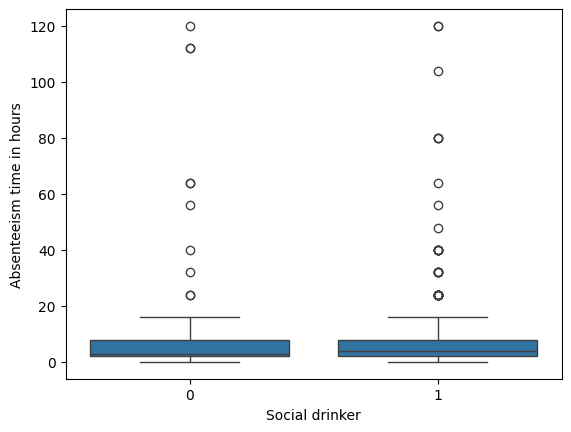

In [24]:
sns.boxplot(x="Social drinker", y=target, data=df)

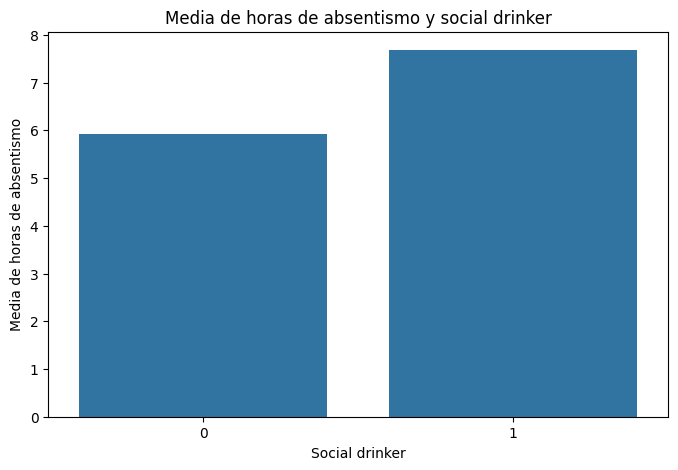

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(x='Social drinker', y=target, data=df, estimator='mean', errorbar=None)
plt.title('Media de horas de absentismo y social drinker')
plt.ylabel('Media de horas de absentismo')
plt.show()


<Axes: xlabel='Social smoker', ylabel='Absenteeism time in hours'>

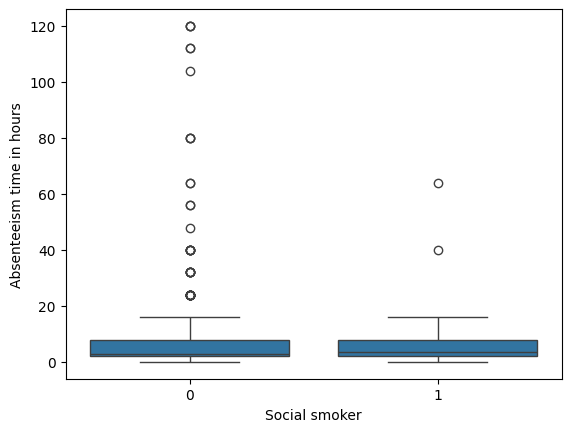

In [26]:
sns.boxplot(x="Social smoker", y=target, data=df)

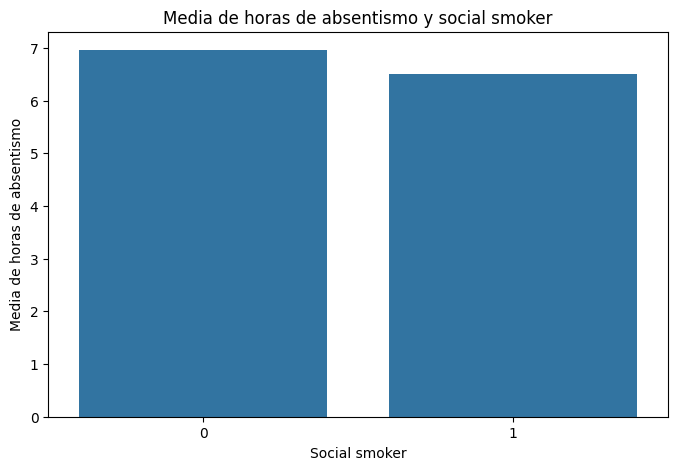

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x='Social smoker', y=target, data=df, estimator='mean', errorbar=None)
plt.title('Media de horas de absentismo y social smoker')
plt.ylabel('Media de horas de absentismo')
plt.show()


*Ser un fumador social no implica mayor horas de absentismo, como es el caso de ser un bebedor social, aunque las variaciones no son especialmente destacables*

Education

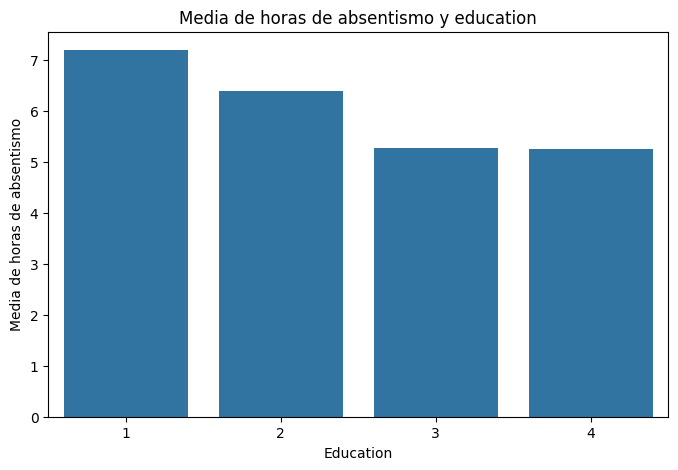

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(x='Education', y=target, data=df, estimator='mean', errorbar=None)
plt.title('Media de horas de absentismo y education')
plt.ylabel('Media de horas de absentismo')
plt.show()

<Axes: xlabel='Education', ylabel='Absenteeism time in hours'>

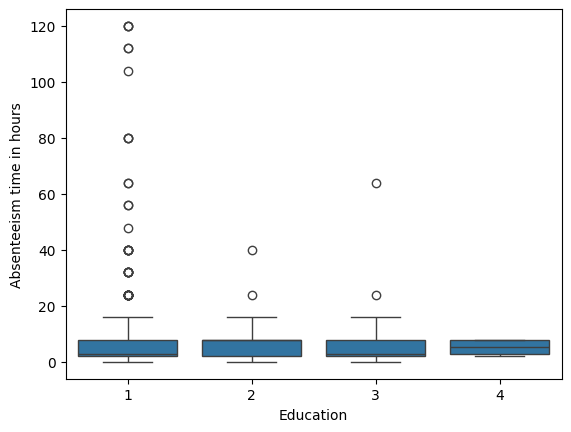

In [29]:
sns.boxplot(x="Education", y=target, data=df)

In [30]:
df["Education"].value_counts(normalize=True)

Education
1    0.825676
3    0.106757
2    0.062162
4    0.005405
Name: proportion, dtype: float64

*(high school (1), graduate (2), postgraduate (3), master and doctor (4)) --> vamos a categorizar según 1: high school, 2: higher education*

In [31]:
df['Education'] = df['Education'].apply(lambda x: 2 if x > 1 else 1)

In [32]:
df["Education"].value_counts(normalize=True)

Education
1    0.825676
2    0.174324
Name: proportion, dtype: float64

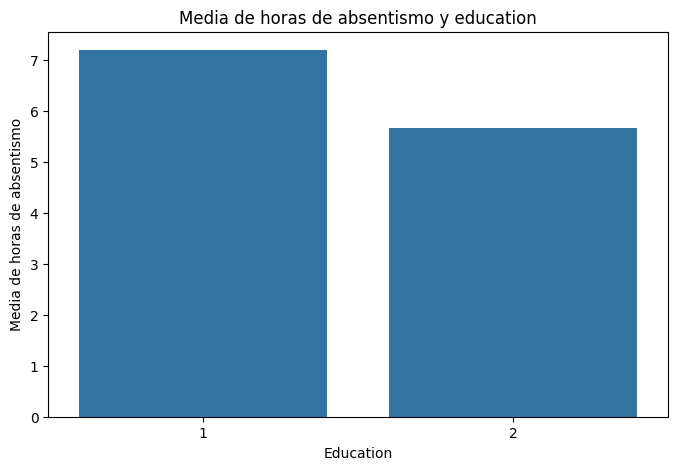

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x='Education', y=target, data=df, estimator='mean', errorbar=None)
plt.title('Media de horas de absentismo y education')
plt.ylabel('Media de horas de absentismo')
plt.show()

Disciplinary failure

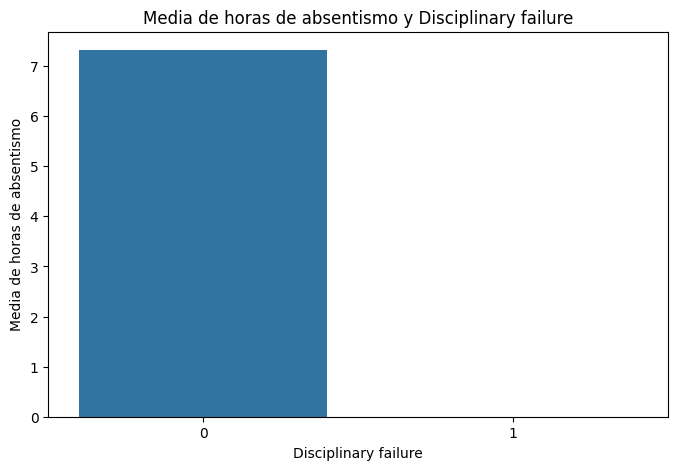

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x='Disciplinary failure', y=target, data=df, estimator='mean', errorbar=None)
plt.title('Media de horas de absentismo y Disciplinary failure')
plt.ylabel('Media de horas de absentismo')
plt.show()

In [35]:
df["Disciplinary failure"].value_counts()

Disciplinary failure
0    700
1     40
Name: count, dtype: int64

<Axes: xlabel='Disciplinary failure', ylabel='Absenteeism time in hours'>

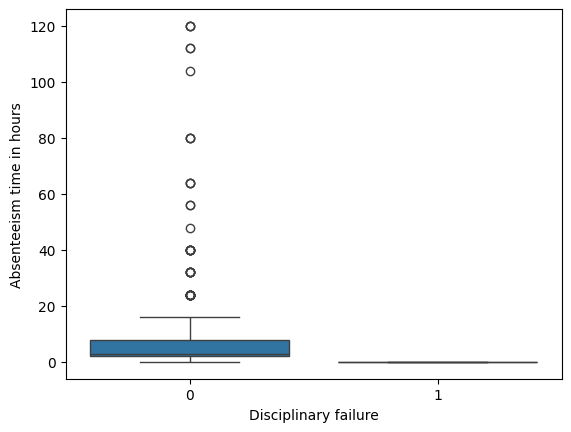

In [36]:
sns.boxplot(x="Disciplinary failure", y=target, data=df)

*Está muy desbalanceado*

**Categorizar `Son` y `Pet`**

*Pet*

<Axes: xlabel='Pet', ylabel='Absenteeism time in hours'>

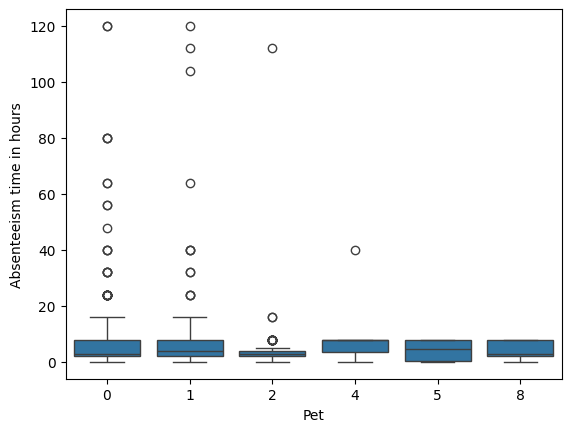

In [37]:
sns.boxplot(x="Pet", y=target, data=df)

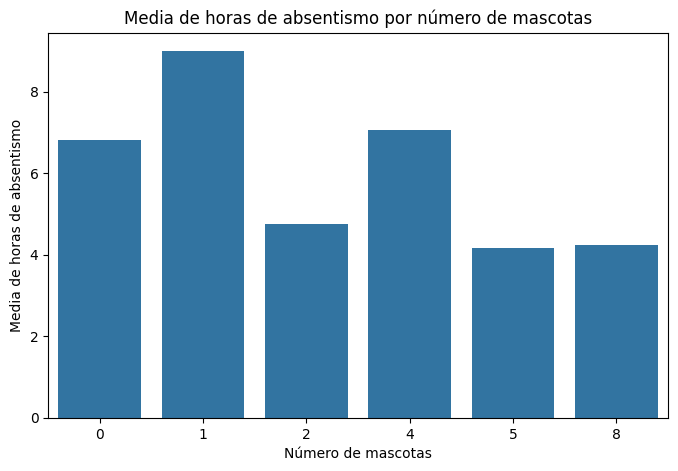

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(x='Pet', y=target, data=df, estimator='mean', errorbar=None)
plt.title('Media de horas de absentismo por número de mascotas')
plt.xlabel('Número de mascotas')
plt.ylabel('Media de horas de absentismo')
plt.show()


<Axes: xlabel='Has_pet', ylabel='Absenteeism time in hours'>

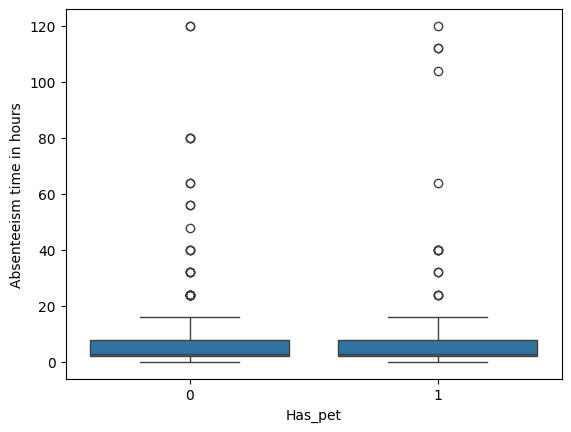

In [39]:
df['Has_pet'] = df['Pet'].apply(lambda x: 1 if x > 0 else 0)
sns.boxplot(x="Has_pet", y=target, data=df)

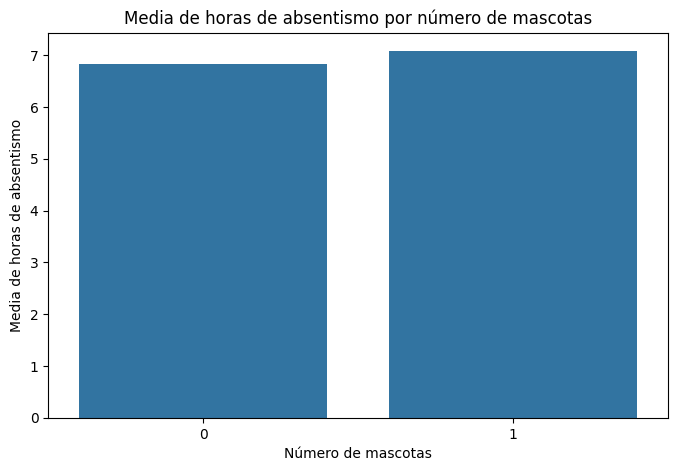

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(x='Has_pet', y=target, data=df, estimator='mean', errorbar=None)
plt.title('Media de horas de absentismo por número de mascotas')
plt.xlabel('Número de mascotas')
plt.ylabel('Media de horas de absentismo')
plt.show()


*Son*

<Axes: xlabel='Son', ylabel='Absenteeism time in hours'>

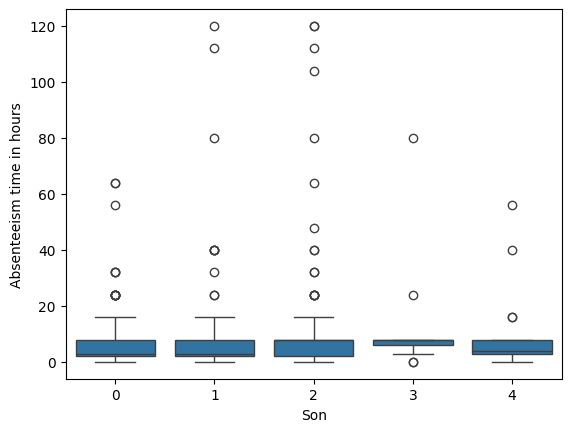

In [41]:
sns.boxplot(x="Son", y=target, data=df)

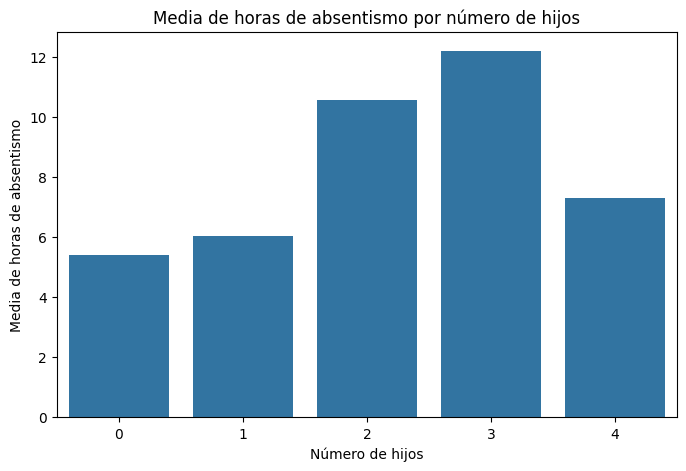

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(x='Son', y='Absenteeism time in hours', data=df, estimator='mean', errorbar=None)
plt.title('Media de horas de absentismo por número de hijos')
plt.xlabel('Número de hijos')
plt.ylabel('Media de horas de absentismo')
plt.show()

<Axes: xlabel='Has_son', ylabel='Absenteeism time in hours'>

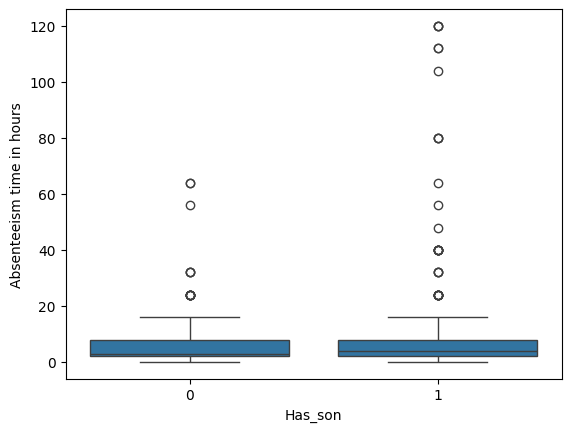

In [43]:
def categorizar_hijos(x):
    if x == 0:
        return 0
    else:
        return 1

df["Has_son"] =df["Son"].apply(categorizar_hijos)
sns.boxplot(x="Has_son", y=target, data=df)

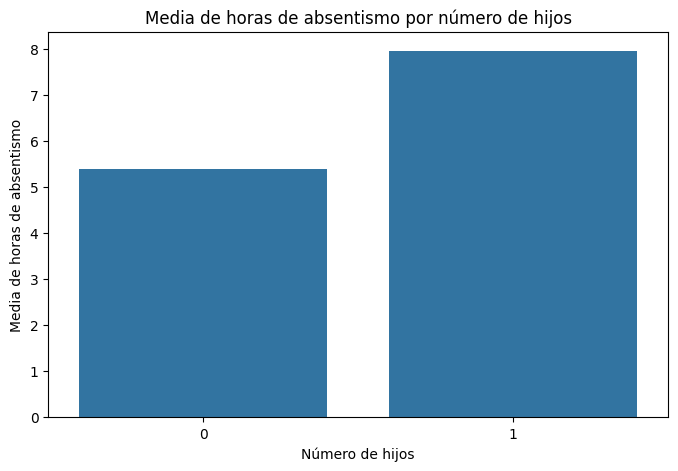

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(x='Has_son', y='Absenteeism time in hours', data=df, estimator='mean', errorbar=None)
plt.title('Media de horas de absentismo por número de hijos')
plt.xlabel('Número de hijos')
plt.ylabel('Media de horas de absentismo')
plt.show()

*Tener o no mascotas no influye tanto en el aumento de horas de absentismo como tener o no hijos*

## Features a excluir

*`ID`, `Height`, `Weight` y `Disciplinary failure` no nos aportan información relevante para la predicción*

## TRATAR COMO PROBLEMA DE CLASIFICACIÓN

In [45]:
df["absent"] = df["Absenteeism time in hours"].apply(lambda x: 1 if x > 0 else 0)

In [46]:
df_clf = df.drop(columns= ["ID", "Height", "Weight", "Disciplinary failure", "Pet", "Son", "BMI_calculado", "log_absenteeism"])

In [47]:
df_clf.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Education', 'Social drinker', 'Social smoker', 'Body mass index',
       'Absenteeism time in hours', 'Reason_Category', 'Has_pet', 'Has_son',
       'absent'],
      dtype='object')

In [48]:
target_clf = "absent"

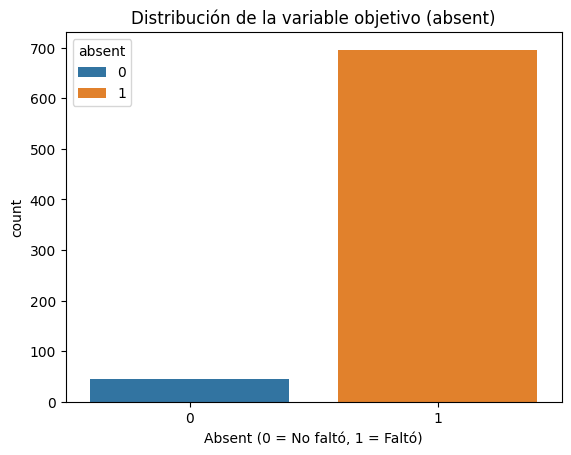

In [49]:
sns.countplot(x="absent", data=df_clf, hue="absent")
plt.title("Distribución de la variable objetivo (absent)")
plt.xlabel("Absent (0 = No faltó, 1 = Faltó)")
plt.show()

In [50]:
df_clf[target_clf].value_counts()

absent
1    696
0     44
Name: count, dtype: int64

*Target muy desequilibrado*

*Podemos ser más flexibles con el número de horas a faltar y hacer una agrupación diferente*

In [51]:
df["Absenteeism time in hours"].describe()

count    740.000000
mean       6.924324
std       13.330998
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: Absenteeism time in hours, dtype: float64

*Vamos con el percentil 50*

In [52]:
df_clf["absent"] = df["Absenteeism time in hours"].apply(lambda x: 1 if x >= 3 else 0)

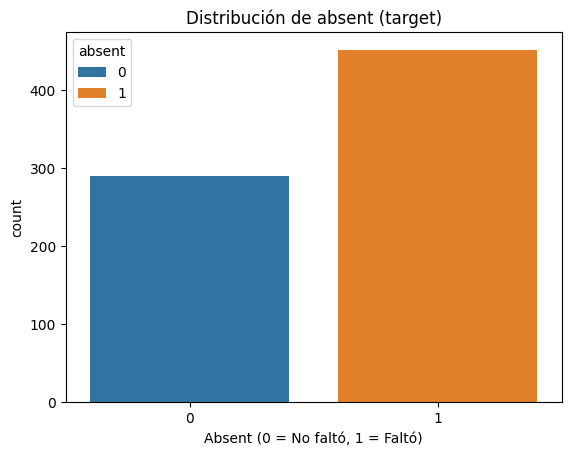

In [53]:
sns.countplot(x="absent", data=df_clf, hue="absent")
plt.title("Distribución de absent (target)")
plt.xlabel("Absent (0 = No faltó, 1 = Faltó)")
plt.savefig('../img/grafico_target.png')
plt.show()

In [54]:
features_num=["Age", "Transportation expense", "Distance from Residence to Work", 
                "Service time", "Work load Average/day ", "Hit target", "Body mass index"]

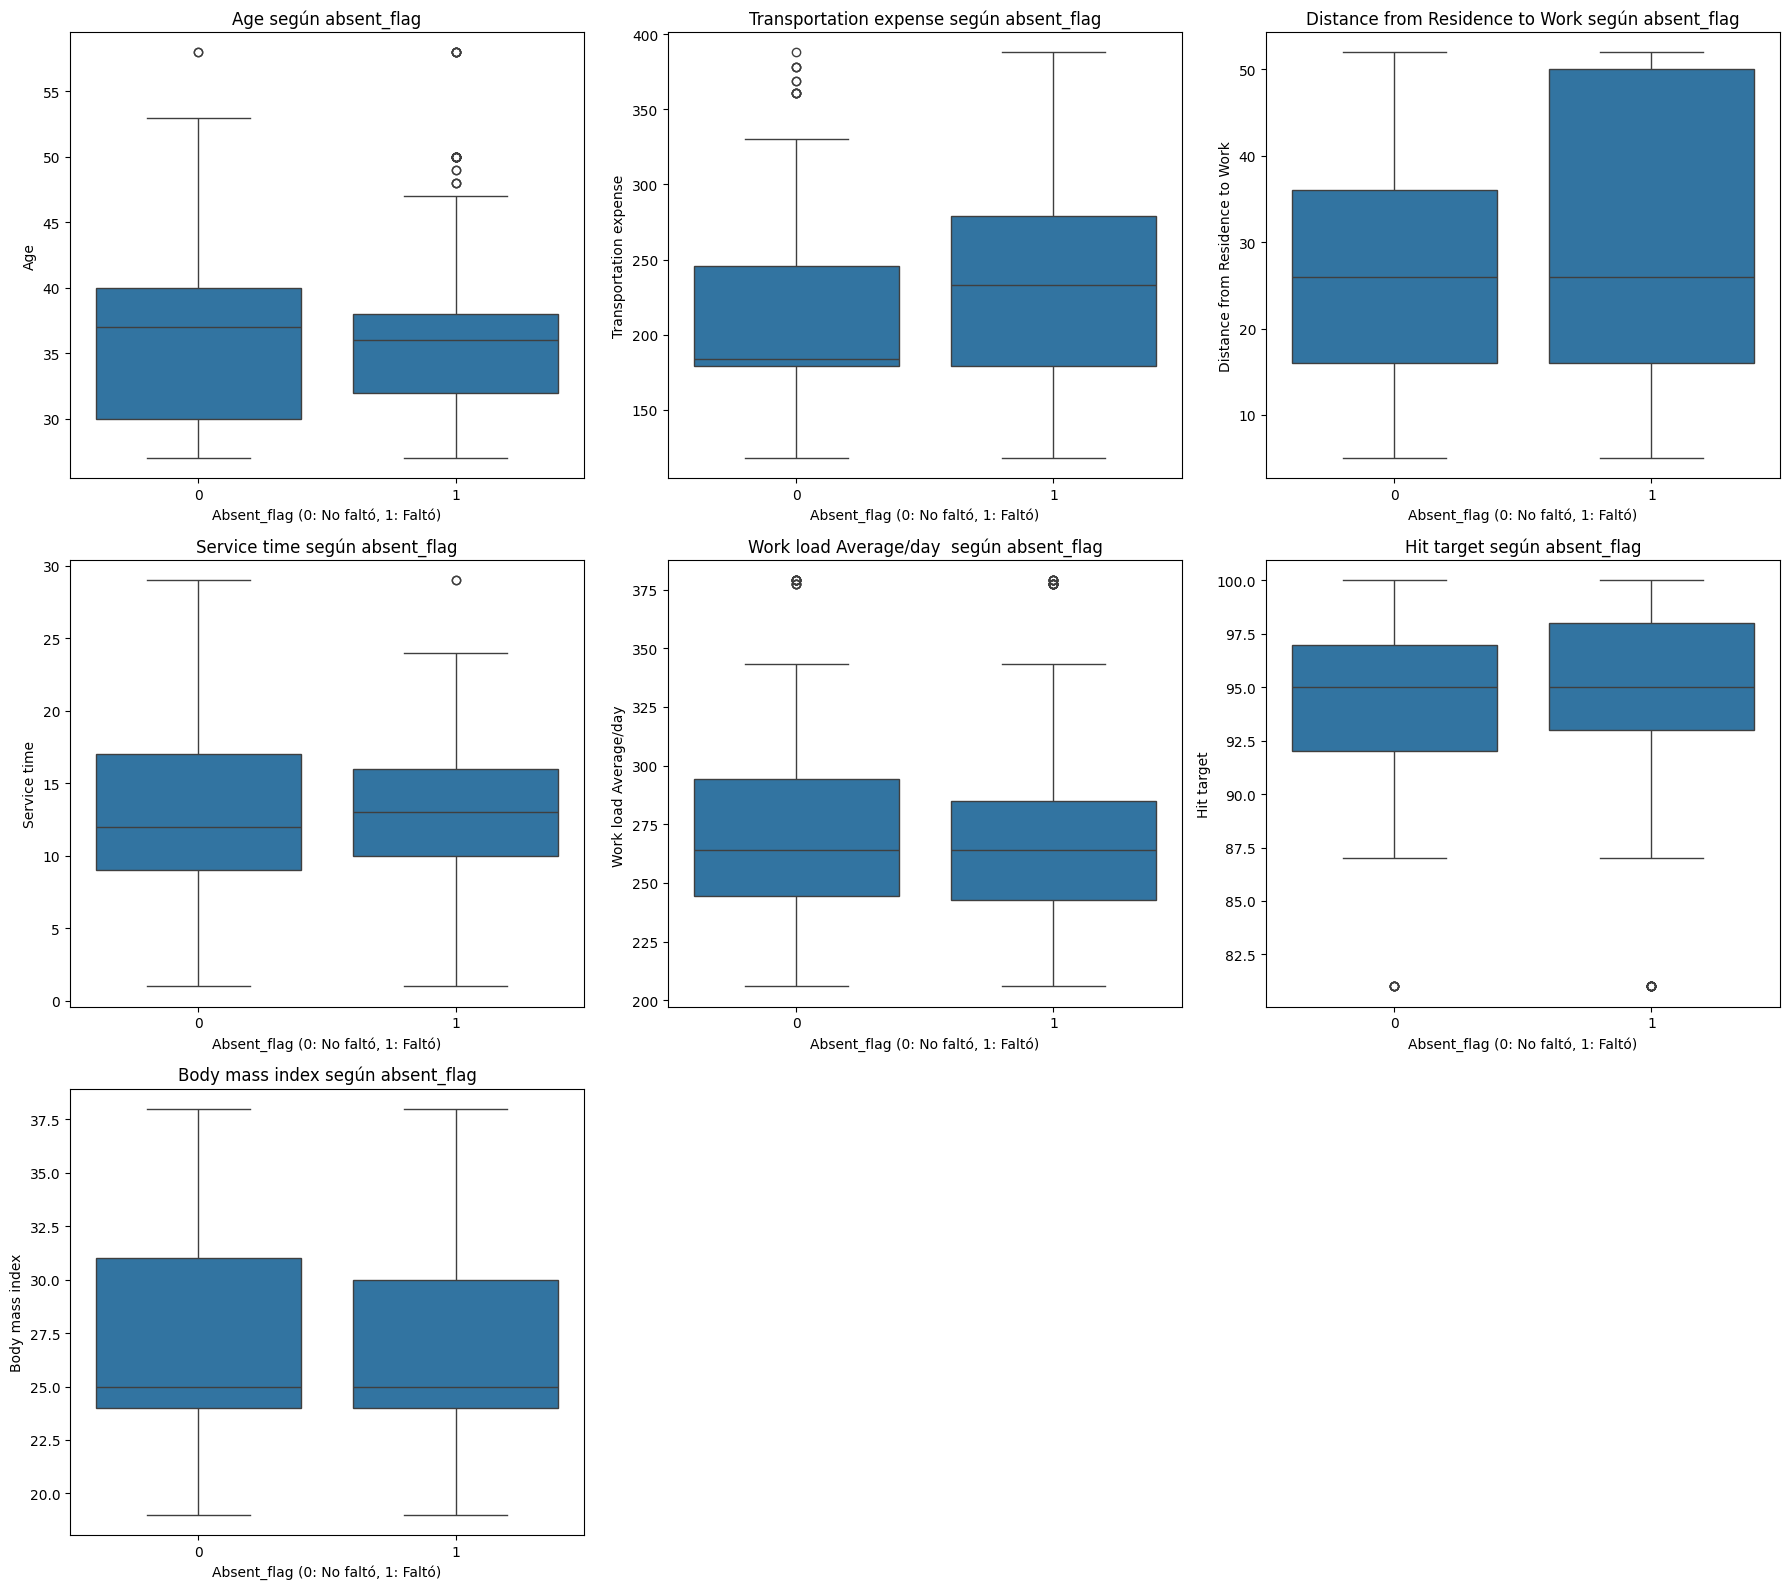

In [55]:
plt.figure(figsize=(18, 16))
for i, var in enumerate(features_num):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x="absent", y=var, data=df_clf)
    plt.title(f"{var} según absent_flag")
    plt.xlabel("Absent_flag (0: No faltó, 1: Faltó)")
    plt.ylabel(var)

plt.tight_layout()
plt.show()

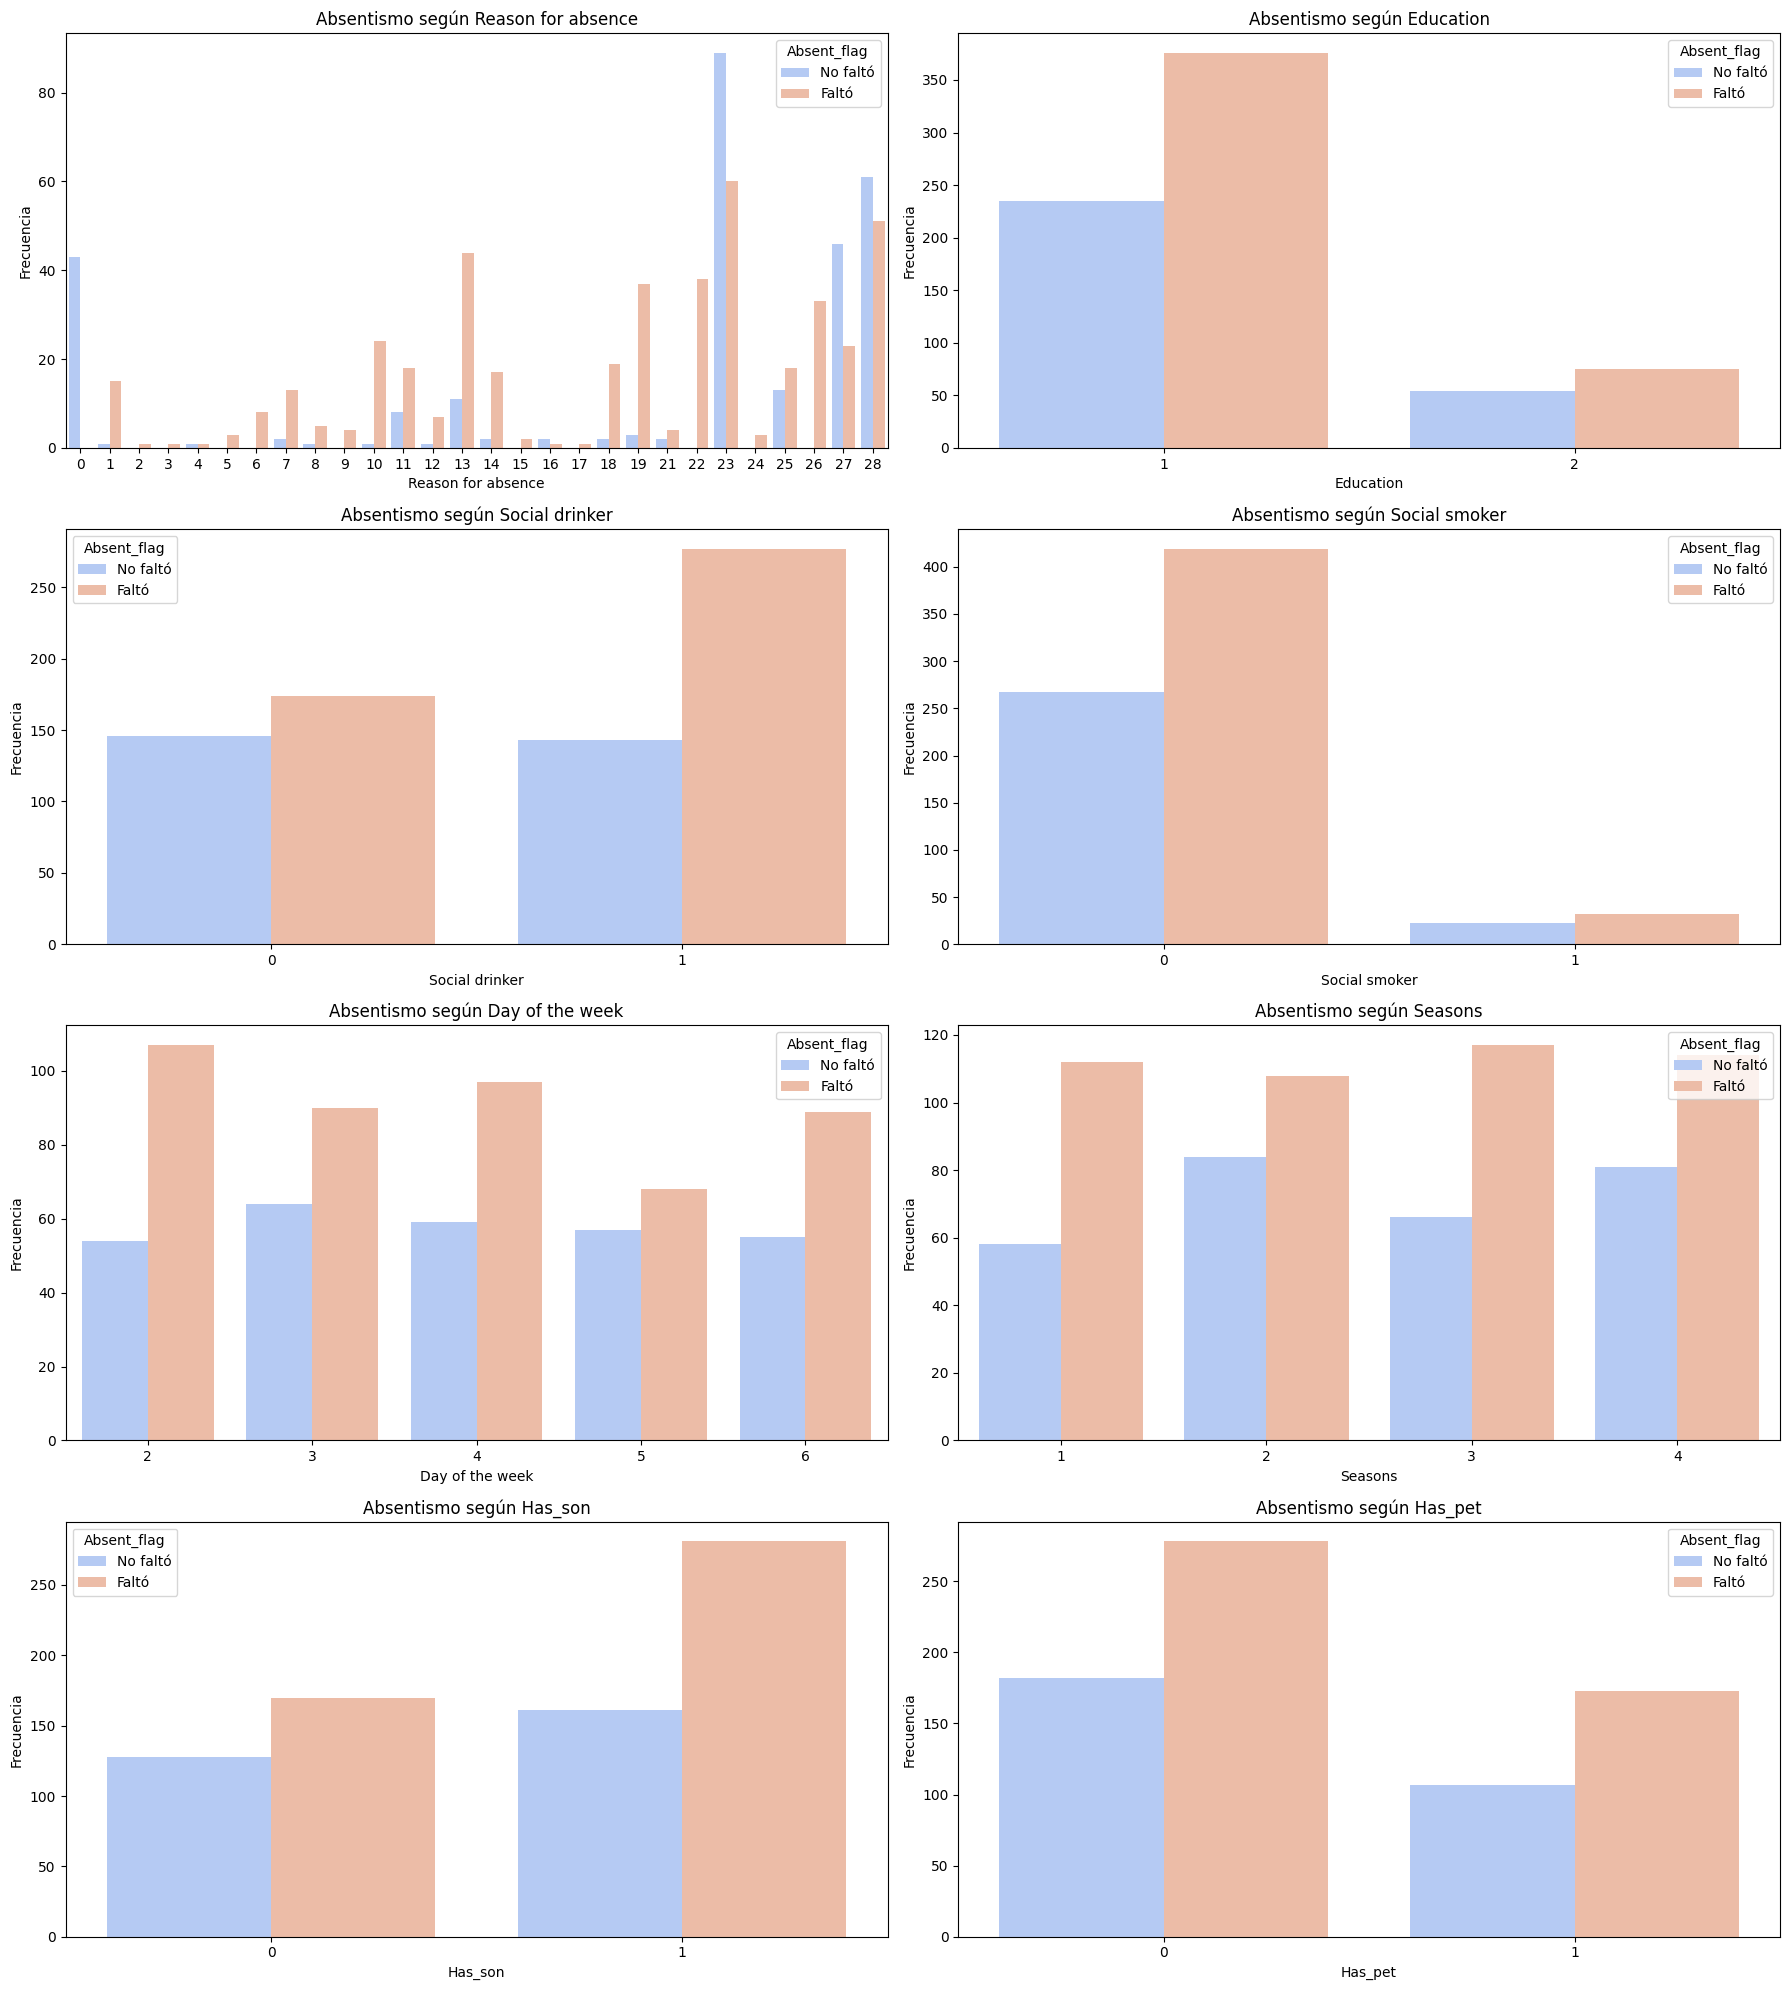

In [56]:
features_cat = ["Reason for absence", "Education", "Social drinker", "Social smoker", "Day of the week", "Seasons", "Has_son", "Has_pet"]

plt.figure(figsize=(18, 20))
for i, var in enumerate(features_cat):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=var, hue="absent", data=df_clf, palette="coolwarm")
    plt.title(f"Absentismo según {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.legend(title="Absent_flag", labels=["No faltó", "Faltó"])

plt.tight_layout()
plt.show()

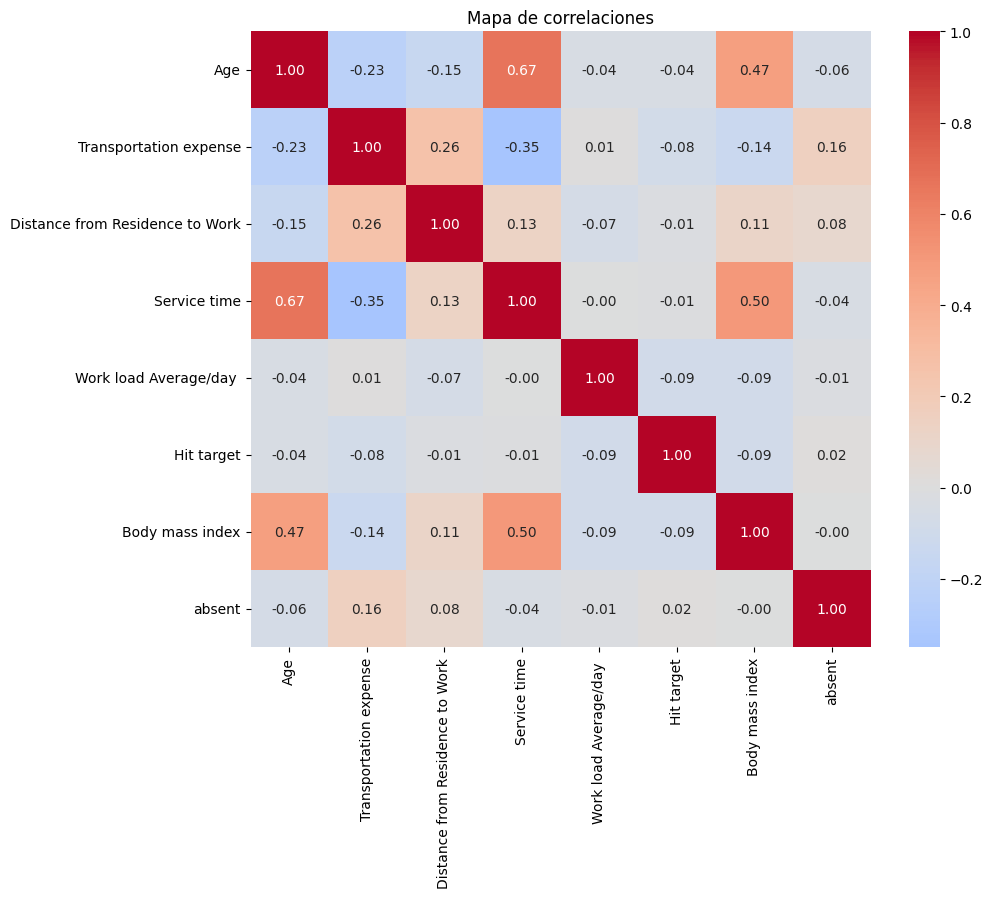

In [57]:
corr = df_clf[features_num + ["absent"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", center=0)
plt.title("Mapa de correlaciones")
plt.show()